# Importing the Necessary Libraries

In [736]:
import pandas as pd
import numpy as np
import math
import warnings

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from functools import reduce

# Task 1: Data Exploration

## 1.1 Data Loading and Inspection

### a. Transactions Table

In [737]:
transactions = pd.read_excel('Raw_data.xlsx', sheet_name = 0)

# prints first five rows
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [738]:
# prints last 5 rows
transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


### Metadata 

In [739]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Data Dimension 

In [740]:
transactions.shape

(20000, 13)

### Statistical Data Summary

In [741]:
transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


### b. New Customer List Table

In [742]:
new_customer_list = pd.read_excel('Raw_data.xlsx', sheet_name = 1)

# prints first five rows
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [743]:
# prints last five rows
new_customer_list.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,1.07,1.0700,1.070000,1.070000,996,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.90,0.9000,1.125000,0.956250,997,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.66,0.8250,0.825000,0.825000,997,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.78,0.9750,0.975000,0.828750,997,997,0.357
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.59,0.7375,0.921875,0.783594,1000,1000,0.340


### Metadata

In [744]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

### Data Dimension

In [745]:
new_customer_list.shape

(1000, 23)


### Statistical Data Summary

In [746]:
new_customer_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747270,0.839145,0.944456,0.872373,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.210585,0.254564,0.306850,0.293649,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.620000,0.700000,0.648125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.825000,0.920000,0.839375,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.040000,1.156250,1.075000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


### c. Customer Demographic Table

In [747]:
customer_demographic = pd.read_excel('Raw_data.xlsx', sheet_name = 2)

# prints first five rows
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [748]:
# prints first five rows
customer_demographic.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05 00:00:00,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


### Metadata

In [749]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

### Data Dimension

In [750]:
customer_demographic.shape

(4000, 13)

### Statistical Data Summary

In [751]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


### d. Customer Address Table

In [752]:
customer_address = pd.read_excel('Raw_data.xlsx', sheet_name = 3)

# prints first five rows
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [753]:
# prints first five rows
customer_address.tail()

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


### Metadata

In [754]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


### Data Dimension 

In [755]:
customer_address.shape

(3999, 6)

### Statistical Data Summary

In [756]:
customer_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


## 1.2 Data Cleaning

### a. Transactions Table

### Checking for null values or empty rows

In [757]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### From the above:
- online_order has 360 empty rows
- brand has 197 empty rows
- product_line has 197 empty rows
-  product_class has 197 empty rows
- product_size has 197 empty rows
- standard_cost has 197 empty rows
- product_first_sold_date has 197 empty rows
- Others have no empty rows

### Percentage of missing values

In [758]:
transactions.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

### Handling null values

### 1. Online Order

<b>Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.</b>

In [759]:
most_freq_online_order = transactions['online_order'].mode()
most_freq_online_order

0    1.0
Name: online_order, dtype: float64

<b>Since 1 is the most frequent value of online order. We will do a mode imputation on this categorical value.</b>

In [760]:
transactions['online_order'].fillna(1, inplace=True)

In [761]:
transactions['online_order'].isnull().sum()

0

In [762]:
# Currently there are no missing values for online_order column

### 2. Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date

### Removing null values

In [763]:
transactions[transactions['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [764]:
transactions[transactions['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [765]:
records_to_drop = transactions[transactions['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [766]:
transactions.drop(index=records_to_drop, axis=0, inplace=True)

In [767]:
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## 2. Creating a new feature "profit" (Feature Extraction)

<b>The Profit column will be the difference between the list price and the standard price of a product.</b>

In [768]:
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

In [769]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 non-nu

In [770]:
# Convert 'transaction_date' to datetime format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Extract month from 'transaction_date'
transactions['transaction_month'] = transactions['transaction_date'].dt.month

month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
transactions['transaction_month'] = transactions['transaction_month'].map(month_map)

transactions['transaction_month'] = pd.Categorical(transactions['transaction_month'],
                                                      categories=['January', 'February', 'March', 'April',
                                                                  'May', 'June', 'July', 'August',
                                                                  'September', 'October', 'November', 'December'],
                                                      ordered=True)

In [771]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,transaction_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87,February
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55,May
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61,October
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36,August
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82,October


###  Check Data for Inconsistency

In [772]:
# We will check whether there is inconsistent data / typographical error data is present in the categorical columns.
# The columns to be checked are 'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'

### 1. Online Order

In [773]:
# There is no inconsistent data in 'online_order' column.

In [774]:
transactions['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

### Changing the data type of online order from float to int

In [775]:
transactions['online_order'] = transactions['online_order'].astype(int)

In [776]:
transactions['online_order'].value_counts()

online_order
1    10097
0     9706
Name: count, dtype: int64

### 2.  Order Status

In [777]:
# There is no inconsistent data in 'order_status' column.

In [778]:
transactions['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

### 3.  Product Line

In [779]:
# There is no inconsistent data in 'product_line' column.

In [780]:
transactions['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

### 4.  Product Class

In [781]:
# There is no inconsistent data in 'product_class' column.

In [782]:
transactions['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

### 5.  Product Size

In [783]:
# There is no inconsistent data in 'product_size' column.

In [784]:
transactions['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

### 6.  Brand

In [785]:
# There is no inconsistent data in 'brand' column.

In [786]:
transactions['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

## Checking for duplicates

In [787]:
transactions.duplicated().sum()

0

In [788]:
# The above means that there are no duplicates

### b. New Customer List Table


### Checking for null values or empty rows

In [789]:
new_customer_list.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [790]:
# From the above:
# last_name has 29 empty rows
# DOB has 17 empty rows
# job_title has 106 empty rows
# job_industry_category has 165 empty rows 
# The others have 0 empty rows

### Percentage of missing values

In [791]:
new_customer_list.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

### 1. Last Name

In [792]:
# Since all customers have a First name, all the customers can be identified by that, so there my be no need for a last name. 
# So, we can replace the null last names with "None"

In [793]:
new_customer_list[new_customer_list['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [794]:
new_customer_list[new_customer_list['last_name'].isnull()]
# This prints all the empty rows in the last_name column

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,...,NSW,Australia,11,0.83,0.8300,1.037500,0.881875,13,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,...,VIC,Australia,5,0.45,0.5625,0.562500,0.478125,57,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,...,NSW,Australia,12,0.57,0.5700,0.712500,0.712500,88,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.60,0.7500,0.937500,0.796875,155,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,9,0.46,0.5750,0.718750,0.718750,202,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,4,0.99,1.2375,1.237500,1.051875,326,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,...,QLD,Australia,3,0.52,0.5200,0.520000,0.520000,329,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,11,0.64,0.6400,0.800000,0.800000,358,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,...,NSW,Australia,1,1.02,1.0200,1.020000,0.867000,420,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,...,NSW,Australia,2,0.74,0.9250,0.925000,0.786250,441,441,0.901000


In [795]:
new_customer_list['last_name'].fillna('None',axis=0, inplace=True)

In [796]:
# The above replaces the empty last names with None 

In [797]:
new_customer_list['last_name'].isnull().sum()

0

In [798]:
new_customer_list.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

### 2. Date of Birth

In [799]:
new_customer_list[new_customer_list['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.74,0.7400,0.740000,0.629000,57,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,...,NSW,Australia,9,0.97,1.2125,1.515625,1.515625,226,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,...,VIC,Australia,3,0.89,1.1125,1.112500,0.945625,324,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,...,QLD,Australia,8,0.51,0.5100,0.510000,0.510000,358,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,...,VIC,Australia,7,0.52,0.6500,0.650000,0.552500,361,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,...,QLD,Australia,6,0.88,0.8800,0.880000,0.748000,375,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.82,0.8200,0.820000,0.697000,433,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,...,VIC,Australia,6,0.64,0.8000,1.000000,0.850000,436,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,...,NSW,Australia,7,0.76,0.7600,0.760000,0.646000,575,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,...,NSW,Australia,11,1.02,1.0200,1.275000,1.275000,599,599,0.775000


In [800]:
round(new_customer_list['DOB'].isnull().mean()*100)

2

In [801]:
# Since less than 5% of data has null date of birth. we can remove the rows where there rows are empty

In [802]:
# Checking the index of the rows where the DOB is empty.
dob_index_drop = new_customer_list[new_customer_list['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [803]:
new_customer_list.drop(index=dob_index_drop, inplace=True, axis=0)

In [804]:
new_customer_list['DOB'].isnull().sum()

0

### Creating Age Column

#### Converting the datatype of DOB Column to datatime and extracting the age

In [805]:
from datetime import datetime

# Convert 'DOB' column to datetime, ignoring errors
new_customer_list['DOB'] = pd.to_datetime(new_customer_list['DOB'], errors='coerce')

# Drop rows with missing or invalid dates
new_customer_list.dropna(subset=['DOB'], inplace=True)

# Calculate age
today = datetime.today()
new_customer_list['age'] = today.year - new_customer_list['DOB'].dt.year

new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750,67
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750,54
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125,45
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125,59


In [806]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            878 non-null    object        
 6   job_industry_category                818 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure             

### Summary of Age column

In [807]:
new_customer_list['age'].describe()

count    983.000000
mean      53.206511
std       17.074268
min       22.000000
25%       41.000000
50%       52.000000
75%       67.000000
max       86.000000
Name: age, dtype: float64

### Creating Age Group Column

In [808]:
# Function to create the age group label
def age_group_label(age):
    lower_bound = (math.floor(age / 10)) * 10
    upper_bound = lower_bound + 9
    return f"{lower_bound}-{upper_bound}"

# Apply the function to the 'age' column
new_customer_list['age_group'] = new_customer_list['age'].apply(age_group_label)

In [809]:
new_customer_list['age_group'].value_counts()

age_group
50-59    197
40-49    182
60-69    173
70-79    125
30-39    125
20-29    111
80-89     70
Name: count, dtype: int64

In [810]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750,67,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750,54,50-59
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750,50,50-59
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125,45,40-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125,59,50-59


<b>The highest number of New Customers are from the Age Group 50-59.</b>

### 3. Job Title

In [811]:
new_customer_list[new_customer_list['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,...,8,0.50,0.6250,0.78125,0.781250,16,16,1.562500,70,70-79
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,...,4,0.49,0.4900,0.49000,0.416500,26,26,1.468750,79,70-79
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,...,10,0.76,0.7600,0.95000,0.950000,30,30,1.460938,64,60-69
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,...,8,0.53,0.6625,0.66250,0.662500,30,30,1.460938,44,40-49
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,8,0.89,0.8900,0.89000,0.756500,38,38,1.437500,45,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,...,3,0.43,0.4300,0.43000,0.365500,951,951,0.450500,47,40-49
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,...,11,0.42,0.5250,0.65625,0.557812,954,954,0.450000,62,60-69
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,...,6,0.93,0.9300,0.93000,0.930000,972,972,0.430000,25,20-29
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,...,10,0.62,0.7750,0.96875,0.823437,972,972,0.430000,26,20-29


In [812]:
dob_index_drop = new_customer_list[new_customer_list['job_title'].isnull()].index
dob_index_drop

Index([ 15,  25,  29,  30,  37,  38,  39,  40,  42,  44,
       ...
       907, 910, 914, 923, 929, 952, 953, 971, 972, 989],
      dtype='int64', length=105)

In [813]:
new_customer_list.drop(index=dob_index_drop, inplace=True, axis=0)

In [814]:
new_customer_list['job_title'].isnull().sum()

0

### 4. Job Industry Category

In [815]:
new_customer_list[new_customer_list['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,...,4,0.84,0.8400,0.840000,0.714000,23,23,1.500000,26,20-29
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,...,8,0.78,0.9750,0.975000,0.975000,23,23,1.500000,47,40-49
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,...,9,0.73,0.7300,0.912500,0.775625,32,32,1.453125,43,40-49
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,...,10,0.88,0.8800,1.100000,1.100000,36,36,1.447656,56,50-59
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,...,8,0.80,0.8000,0.800000,0.800000,44,44,1.421094,58,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Rhodie,Gaskall,Female,83,1964-02-01,VP Quality Control,NaN,Mass Customer,N,Yes,...,9,0.57,0.7125,0.890625,0.757031,956,956,0.446250,60,60-69
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,...,4,0.90,0.9000,0.900000,0.765000,960,960,0.442000,57,50-59
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,...,6,1.05,1.3125,1.312500,1.312500,974,974,0.425000,56,50-59
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,...,8,0.45,0.5625,0.562500,0.478125,979,979,0.416500,32,30-39


In [816]:
new_customer_list['job_industry_category'].isnull().sum()

143

In [817]:
dob_index_drop = new_customer_list[new_customer_list['job_industry_category'].isnull()].index
dob_index_drop

Index([ 22,  23,  33,  36,  43,  47,  57,  58,  69,  73,
       ...
       913, 920, 941, 950, 954, 957, 959, 975, 980, 983],
      dtype='int64', length=143)

In [818]:
new_customer_list.drop(index=dob_index_drop, inplace=True, axis=0)

In [819]:
new_customer_list.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Unnamed: 16                            0
Unnamed: 17                            0
Unnamed: 18                            0
Unnamed: 19                            0
Unnamed: 20                            0
Rank                                   0
Value                                  0
age                                    0
age_group       

### Drop Unnamed Columns

In [820]:
new_customer_list.drop(columns=['Unnamed: 16'], inplace=True)
new_customer_list.drop(columns=['Unnamed: 17'], inplace=True)
new_customer_list.drop(columns=['Unnamed: 18'], inplace=True)
new_customer_list.drop(columns=['Unnamed: 19'], inplace=True)
new_customer_list.drop(columns=['Unnamed: 20'], inplace=True)

In [821]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,67,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,54,50-59
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50,50-59
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,45,40-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,59,50-59


### Check Data for Inconsistency

We will check whether there is inconsistent data / typo error data is present in the categorical columns.<br>
The columns to be checked are <b>'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'</b>

### 1. Gender

In [822]:
# There is no inconsistent data in gender column.

In [823]:
new_customer_list['gender'].value_counts()

gender
Female    380
Male      355
Name: count, dtype: int64

### 2. Wealth Segment

In [824]:
# There is no inconsistent data in wealth_segment column.

In [825]:
new_customer_list['wealth_segment'].value_counts()

wealth_segment
Mass Customer        369
High Net Worth       184
Affluent Customer    182
Name: count, dtype: int64

### 3. Deceased Indicator

In [826]:
# There is no inconsistent data in deceased_indicator column.

In [827]:
new_customer_list['deceased_indicator'].value_counts()

deceased_indicator
N    735
Name: count, dtype: int64

### 4. Owns a Car

In [828]:
# There is no inconsistent data in owns_car column.

In [829]:
new_customer_list['owns_car'].value_counts()

owns_car
No     376
Yes    359
Name: count, dtype: int64

### 5. State

In [830]:
# There is no inconsistent data in state column.

In [831]:
new_customer_list['state'].value_counts()

state
NSW    364
VIC    200
QLD    171
Name: count, dtype: int64

### 6. Country

In [832]:
# There is no inconsistent data in country column.

In [833]:
new_customer_list['country'].value_counts()

country
Australia    735
Name: count, dtype: int64

### 7. Postcode

In [834]:
# There is no inconsistent data in postcode column.

In [835]:
new_customer_list[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
391,2207,NSW
236,2281,NSW
641,2525,NSW
636,2197,NSW
625,2147,NSW
...,...,...
256,3206,VIC
255,3031,VIC
613,3782,VIC
323,3020,VIC


### 8. Address

In [836]:
# There is no inconsistent data in address column.

In [837]:
new_customer_list[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
546,0 Kipling Way,2289,NSW,Australia
...,...,...,...,...
654,99 Sherman Parkway,3083,VIC,Australia
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia


### 9. Tenure

In [838]:
# There is no inconsistent data in tenure column. 

In [839]:
new_customer_list['tenure'].describe()

count    735.000000
mean      11.378231
std        5.003657
min        1.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

In [840]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure             

In [841]:
new_customer_list.shape

(735, 20)


### Checking for duplicates and handling them

In [842]:
new_customer_list.duplicated().sum()

0

In [843]:
# The above means that there are no duplicates

## c. Customer Demographic

In [844]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

### Dropping Unnecesary Columns

In [845]:
# default is an unnecessary column, hence it should be dropped.

In [846]:
# Dropping the default column

customer_demographic.drop(labels=['default'], axis=1 , inplace=True)

### Checking for null values or empty rows

In [847]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [848]:
# From the above:
# last_name has 125 empty rows
# DOB has 87 empty rows
# job_title has 506 empty rows
# job_industry_category has 656 empty rows 
# tenure has 87 empty rows
# The others have 0 empty rows

### Percentage of missing values

In [849]:
customer_demographic.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

### 1. Last Name

In [850]:
customer_demographic[customer_demographic['last_name'].isnull()]
# This prints all the empty rows in the last_name column

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14 00:00:00,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03 00:00:00,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28 00:00:00,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27 00:00:00,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17 00:00:00,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17 00:00:00,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07 00:00:00,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06 00:00:00,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [851]:
# We will drop the empty rows

In [852]:
dob_index_drop = customer_demographic[customer_demographic['last_name'].isnull()].index
dob_index_drop

Index([   3,   66,  105,  138,  196,  210,  249,  250,  256,  274,
       ...
       3634, 3650, 3717, 3755, 3816, 3884, 3915, 3926, 3961, 3998],
      dtype='int64', length=125)

In [853]:
customer_demographic.drop(index=dob_index_drop, inplace=True, axis=0)

In [854]:
customer_demographic['last_name'].isnull().sum()

0

### 2. Date of Birth

In [855]:
customer_demographic[customer_demographic['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [856]:
round(customer_demographic['DOB'].isnull().mean()*100)

2

In [857]:
# Since less than 5% of data has null date of birth, we can remove the empty rows 

In [858]:
# Checking the index of the rows where the DOB is empty.

dob_index_drop = customer_demographic[customer_demographic['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  547,  581,  598,
        679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037, 1043,
       1081, 1173, 1209, 1243, 1476, 1508, 1582, 1627, 1682, 1739, 1772, 1779,
       1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251, 2294, 2334,
       2340, 2413, 2425, 2468, 2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998,
       3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364,
       3472, 3509, 3512, 3564, 3653, 3726, 3778, 3882, 3930, 3934, 3997],
      dtype='int64')

In [859]:
customer_demographic.drop(index=dob_index_drop, inplace=True, axis=0)

In [860]:
customer_demographic['DOB'].isnull().sum()

0

### Creating Age Column

#### Converting the datatype of DOB Column to datatime and extracting the age

In [861]:
from datetime import datetime

# Convert 'DOB' column to datetime, ignoring errors
customer_demographic['DOB'] = pd.to_datetime(customer_demographic['DOB'], errors='coerce')

# Drop rows with missing or invalid dates
customer_demographic.dropna(subset=['DOB'], inplace=True)

# Calculate age
today = datetime.today()
customer_demographic['age'] = today.year - customer_demographic['DOB'].dt.year

customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,71
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,44
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,58


### Creating Age Group Column

In [862]:
# Function to create the age group label
def age_group_label(age):
    lower_bound = (math.floor(age / 10)) * 10
    upper_bound = lower_bound + 9
    return f"{lower_bound}-{upper_bound}"

# Apply the function to the 'age' column
customer_demographic['age_group'] = customer_demographic['age'].apply(age_group_label)

In [863]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3792 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3792 non-null   int64         
 1   first_name                           3792 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3792 non-null   object        
 4   past_3_years_bike_related_purchases  3792 non-null   int64         
 5   DOB                                  3792 non-null   datetime64[ns]
 6   job_title                            3311 non-null   object        
 7   job_industry_category                3161 non-null   object        
 8   wealth_segment                       3792 non-null   object        
 9   deceased_indicator                   3792 non-null   object        
 10  owns_car         

In [864]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,71,70-79
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,44,40-49
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70,70-79
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47,40-49
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,58,50-59


In [865]:
customer_demographic['age_group'].value_counts()

age_group
40-49      1095
50-59       803
30-39       715
60-69       663
20-29       433
70-79        77
80-89         4
180-189       1
90-99         1
Name: count, dtype: int64

### Summary of Age column

In [866]:
customer_demographic['age'].describe()

count    3792.000000
mean       47.013713
std        12.788803
min        22.000000
25%        37.750000
50%        47.000000
75%        56.000000
max       181.000000
Name: age, dtype: float64

In [867]:
# From the above summary, we realize that there is a customer that is aged 181 years which clearly is an outlier because the 75th percentile of Age is 56.

In [868]:
customer_demographic[customer_demographic['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,181,180-189


In [869]:
# The above row needs to be removed since it is an outlier

### Dropping the outlier

In [870]:
age_outlier_drop = customer_demographic[customer_demographic['age']>100].index

customer_demographic.drop(index=age_outlier_drop, inplace=True , axis=0)

### 3. Tenure

#### Removing the row where tenure is null

In [871]:
# Since the Date of Birth was Null, the Tenure row was automatically null too.
# So, that row has to be removed 

In [872]:
customer_demographic['tenure'].isnull().sum()

0

### 4. Job Title

In [873]:
customer_demographic[customer_demographic['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,58,50-59
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48,40-49
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,70,70-79
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,62,60-69
22,23,Olav,Polak,Male,43,1995-02-10,NaN,NaN,High Net Worth,N,Yes,1.0,29,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,3960,Hobart,Burgan,Male,6,2000-03-16,NaN,Property,Mass Customer,N,No,1.0,24,20-29
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,47,40-49
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,45,40-49
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,50,50-59


In [874]:
# Checking the index of the rows where the DOB is empty.

dob_index_drop = customer_demographic[customer_demographic['job_title'].isnull()].index
dob_index_drop

Index([   5,    6,   10,   21,   22,   29,   45,   51,   59,   61,
       ...
       3938, 3944, 3945, 3951, 3958, 3959, 3967, 3971, 3978, 3986],
      dtype='int64', length=481)

In [875]:
customer_demographic.drop(index=dob_index_drop, inplace=True, axis=0)

In [876]:
customer_demographic['job_title'].isnull().sum()

0

### 5. Job Industry Category

In [877]:
customer_demographic[customer_demographic['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47,40-49
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,62,60-69
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,47,40-49
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,62,60-69
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,57,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0,56,50-59
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63,60-69
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,67,60-69
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,59,50-59


In [878]:
# Checking the index of the rows where the DOB is empty.

dob_index_drop = customer_demographic[customer_demographic['job_industry_category'].isnull()].index
dob_index_drop

Index([   4,    7,   15,   16,   17,   32,   35,   47,   48,   56,
       ...
       3924, 3946, 3950, 3956, 3962, 3965, 3973, 3975, 3982, 3999],
      dtype='int64', length=531)

In [879]:
customer_demographic.drop(index=dob_index_drop, inplace=True, axis=0)

In [880]:
customer_demographic['job_industry_category'].isnull().sum()

0

In [881]:
customer_demographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
age_group                              0
dtype: int64

In [882]:
# The above shows that all he missing values have been taken care of

### Check Data for Inconsistency

In [883]:
# We will check whether there is inconsistent data / typographical error data is present in the categorical columns.
# The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

### 1. Gender

In [884]:
customer_demographic['gender'].value_counts()

gender
Female    1444
Male      1333
F            1
Femal        1
Name: count, dtype: int64

In [885]:
# From the above,the gender column contains inconsistent data as there are some typographic errors.
# The rows that have gender with value 'M' will be replaced by 'Male' and those that have gender with value 'F' and 'Femal' will be replaced by 'Female'

In [886]:
def replace_gender(gender):
    
    """Making Gender as Male and Female as standards"""
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

customer_demographic['gender'] = customer_demographic['gender'].apply(replace_gender)

In [887]:
customer_demographic['gender'].value_counts()

gender
Female    1446
Male      1333
Name: count, dtype: int64

### 2. Wealth Segment

There is <b>no inconsistent data</b> in <b>wealth_segment</b> column.

In [888]:
customer_demographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1384
High Net Worth        710
Affluent Customer     685
Name: count, dtype: int64

### 3. Deceased Indicator

There is <b>no inconsistent data</b> in <b>deceased_indicator</b> column.

In [889]:
customer_demographic['deceased_indicator'].value_counts()

deceased_indicator
N    2777
Y       2
Name: count, dtype: int64

### 4. Owns a Car

There is <b>no inconsistent data</b> in <b>owns_car</b> column.

In [890]:
customer_demographic['owns_car'].value_counts()

owns_car
Yes    1421
No     1358
Name: count, dtype: int64

In [891]:
customer_demographic.shape

(2779, 14)

### Checking for duplicates

In [892]:
customer_demographic.duplicated().sum()

0

## d. Customer Address

### Checking for null values or empty rows

In [893]:
customer_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [894]:
# The above shows that the table has no empty row

###  Check Data for Inconsistency

In [895]:
# We will check whether inconsistent data / typographical error data is present in the categorical columns.
# The columns to be checked are 'address', 'postcode' ,'state', 'country'.

### 1. State

In [896]:
customer_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [897]:
# From the above, there are inconsistent data in the State column. 
# For New South Wales and Victoria, there are two values- one being the full name and the other being the abbreviation.
# The State names should be standardised and  columns with state as 'New South Wales' will be replaced by 'NSW' and columns with state as 'Victoria' will be replaced by 'VIC'.

### Replace Values

In [898]:
customer_address['state'] = customer_address['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'})

In [899]:
customer_address['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

### 2. Country

In [900]:
customer_address['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

### 3. Postcode

In [901]:
# The Postcode column contains no inconsistency / typo in the data.

In [902]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [903]:
customer_address[['address','postcode', 'state' , 'country']].drop_duplicates()

,address,postcode,state,country
0,060 Morning Avenue,2016,NSW,Australia
1,6 Meadow Vale Court,2153,NSW,Australia
2,0 Holy Cross Court,4211,QLD,Australia
3,17979 Del Mar Point,2448,NSW,Australia
4,9 Oakridge Court,3216,VIC,Australia
...,...,...,...,...
3994,1482 Hauk Trail,3064,VIC,Australia
3995,57042 Village Green Point,4511,QLD,Australia
3996,87 Crescent Oaks Alley,2756,NSW,Australia
3997,8194 Lien Street,4032,QLD,Australia


### Checking for duplicates

In [904]:
customer_address.duplicated().sum()

0

## 1.2 Data Visualization

### a. Transaction Table

### Histogram : used to visualize the numerical features

In [905]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  int32         
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 non-nu

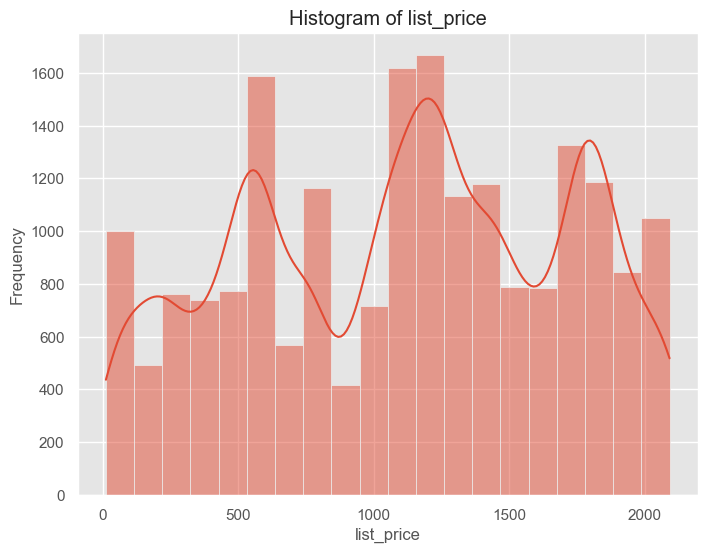

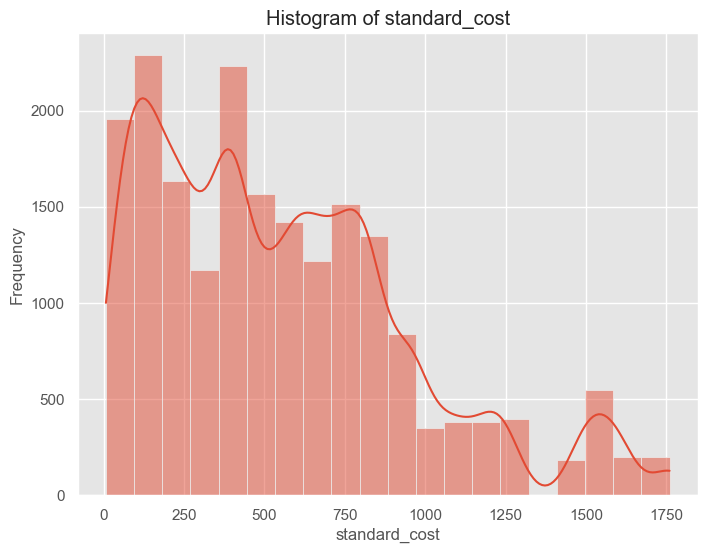

In [906]:
numerical_features = ["list_price", "standard_cost"]

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=transactions[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


<Axes: xlabel='profit', ylabel='Density'>

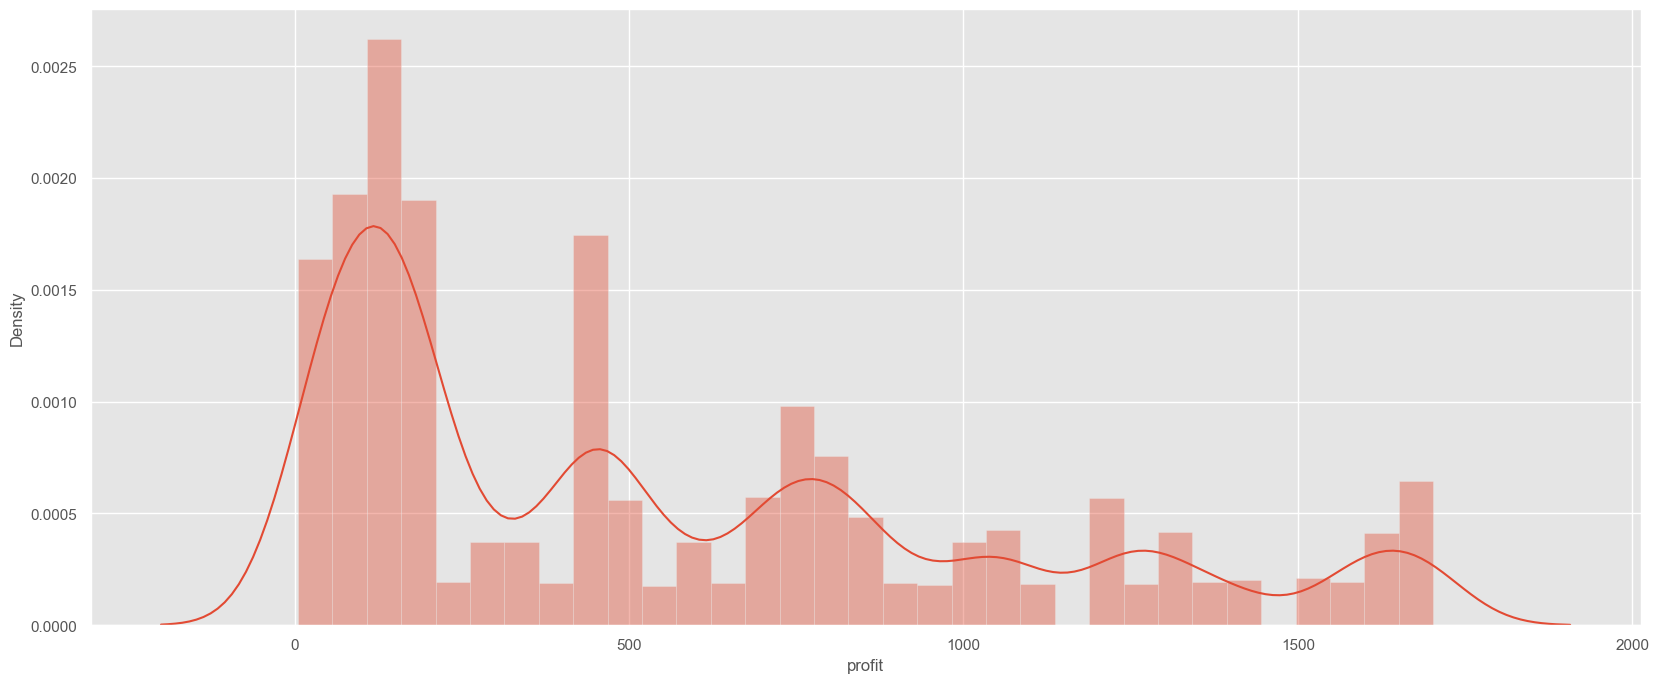

In [907]:
# Distribution of the profit column

plt.figure(figsize=(20,8))
sns.distplot(transactions['profit'])

### Count Plot : used to visualize the categorical features

In [908]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,transaction_month
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87,February
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55,May
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61,October
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36,August
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82,October


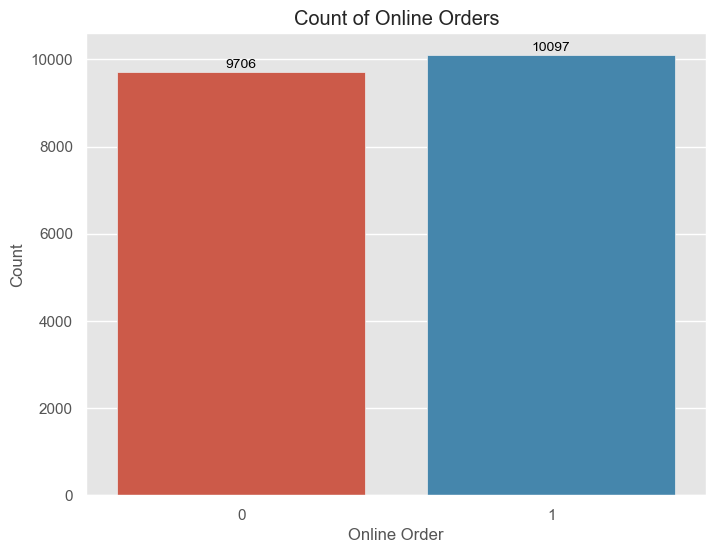

In [909]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transactions, x='online_order')
plt.title('Count of Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [910]:
transactions['transaction_month'].value_counts()

transaction_month
October      1751
August       1735
July         1700
May          1666
January      1665
November     1648
April        1641
December     1633
March        1629
February     1612
June         1564
September    1559
Name: count, dtype: int64

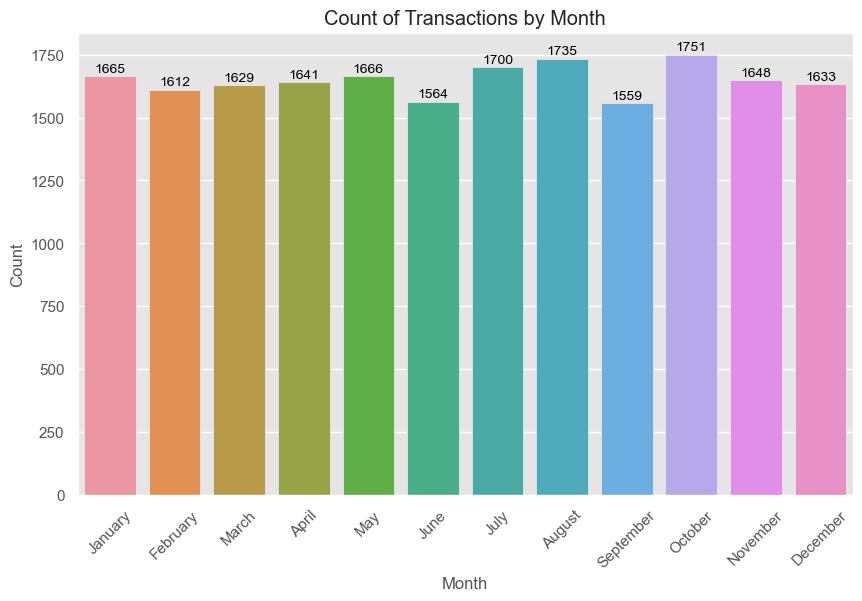

In [911]:
# Converting 'transaction_date' to datetime format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Extracting month from 'transaction_date'
transactions['transaction_month'] = transactions['transaction_date'].dt.month

# Mapping month numbers to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
transactions['transaction_month'] = transactions['transaction_month'].map(month_map)

# Converting 'transaction_month' to categorical with proper ordering
transactions['transaction_month'] = pd.Categorical(transactions['transaction_month'],
                                                      categories=['January', 'February', 'March', 'April',
                                                                  'May', 'June', 'July', 'August',
                                                                  'September', 'October', 'November', 'December'],
                                                      ordered=True)

# Plot count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=transactions, x='transaction_month')
plt.title('Count of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

### Stacked Bar Plot

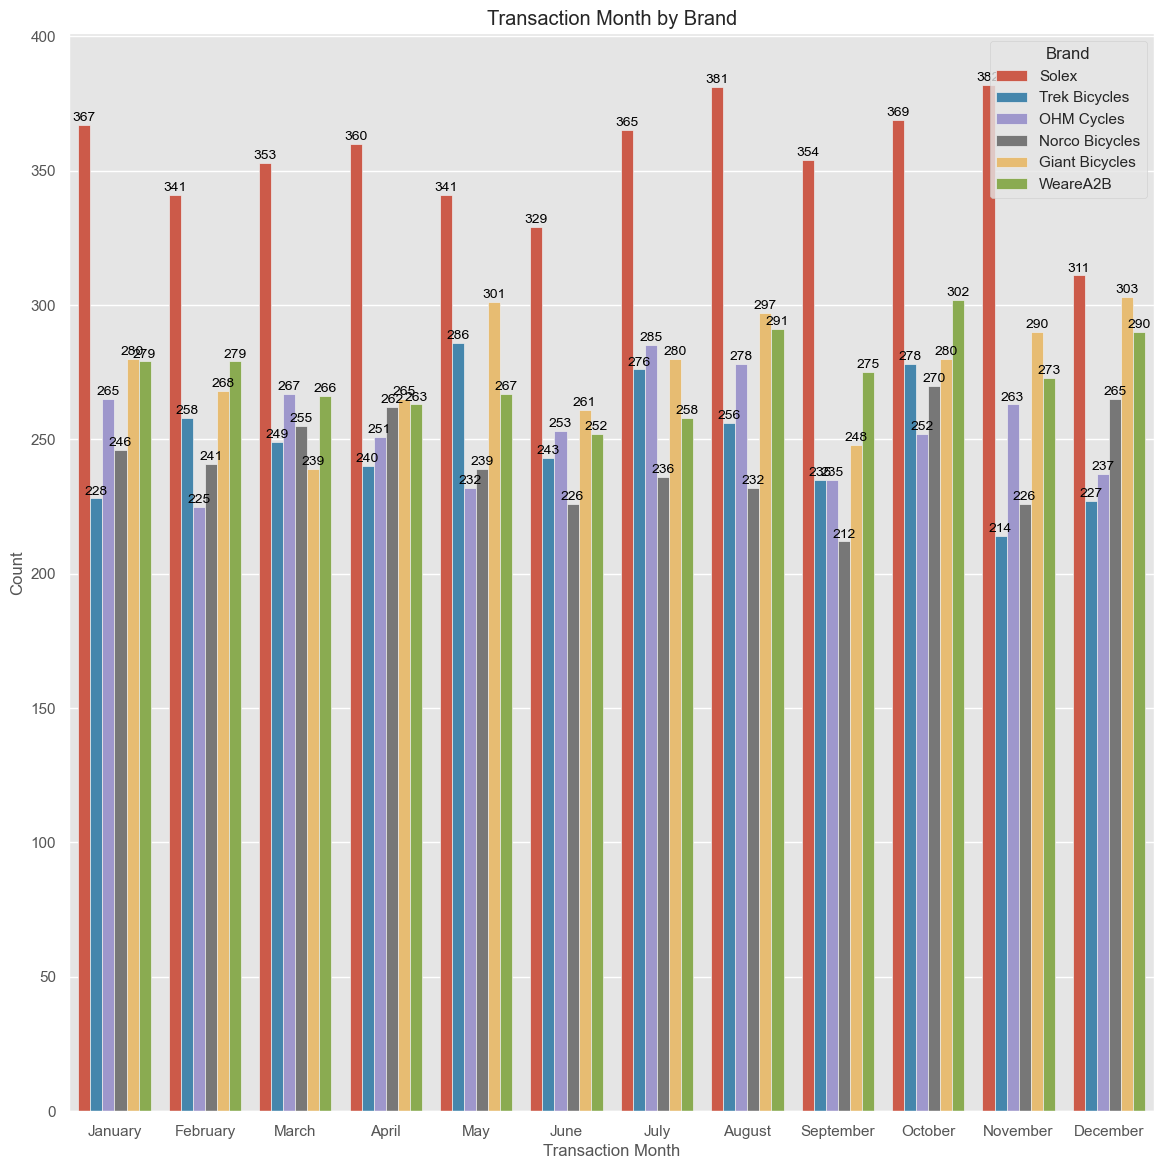

In [912]:
plt.figure(figsize=(14, 14))
sns.countplot(data=transactions, x ='transaction_month', hue='brand')
plt.title('Transaction Month by Brand')
plt.xlabel('Transaction Month')
plt.ylabel('Count')
plt.legend(title='Brand')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

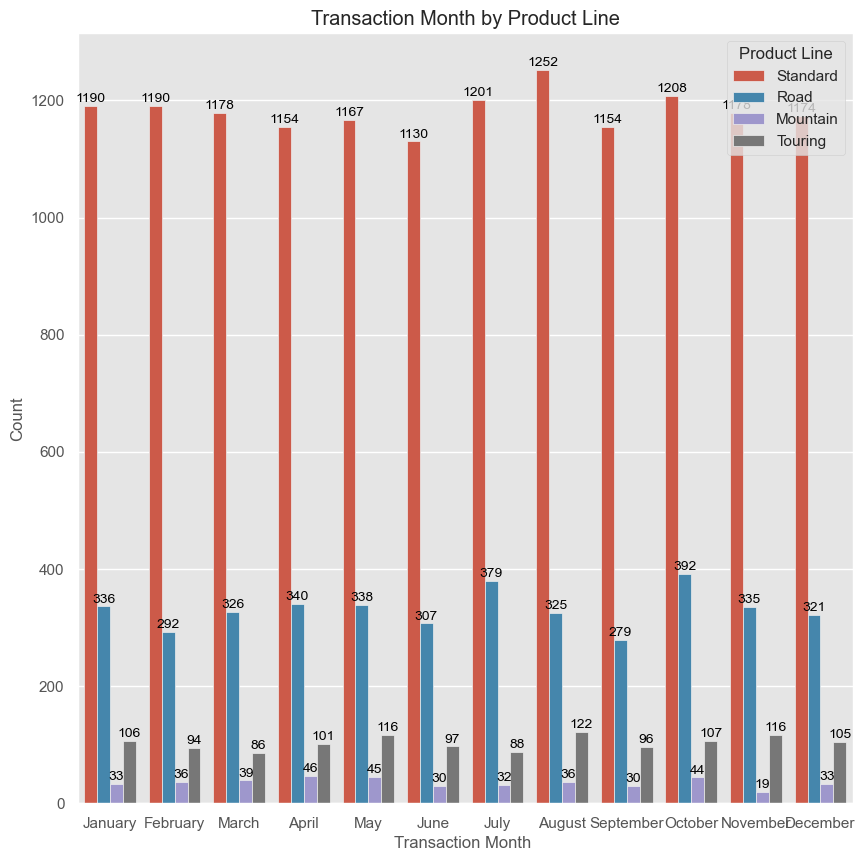

In [913]:
plt.figure(figsize=(10, 10))
sns.countplot(data=transactions, x ='transaction_month', hue='product_line')
plt.title('Transaction Month by Product Line')
plt.xlabel('Transaction Month ')
plt.ylabel('Count')
plt.legend(title='Product Line')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

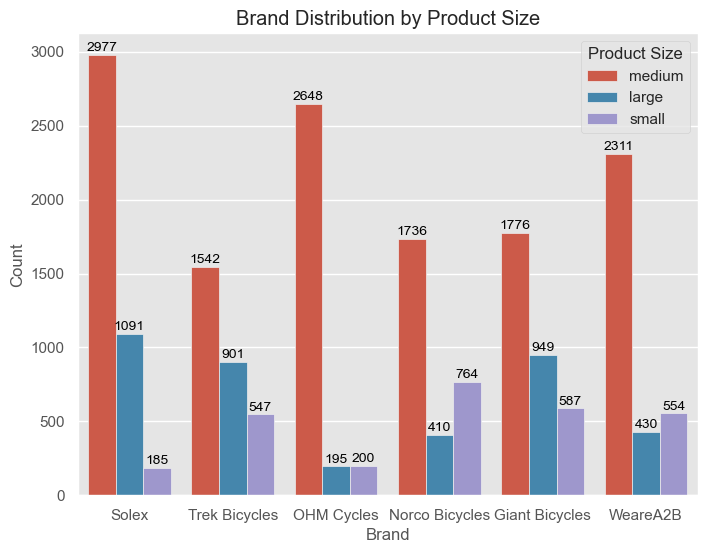

In [914]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transactions, x='brand', hue='product_size')
plt.title('Brand Distribution by Product Size')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Product Size')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

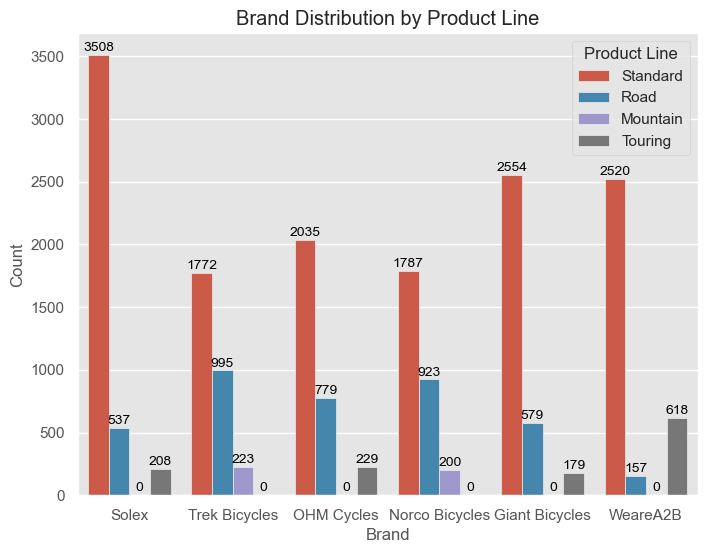

In [915]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transactions, x='brand', hue='product_line')
plt.title('Brand Distribution by Product Line')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Product Line')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

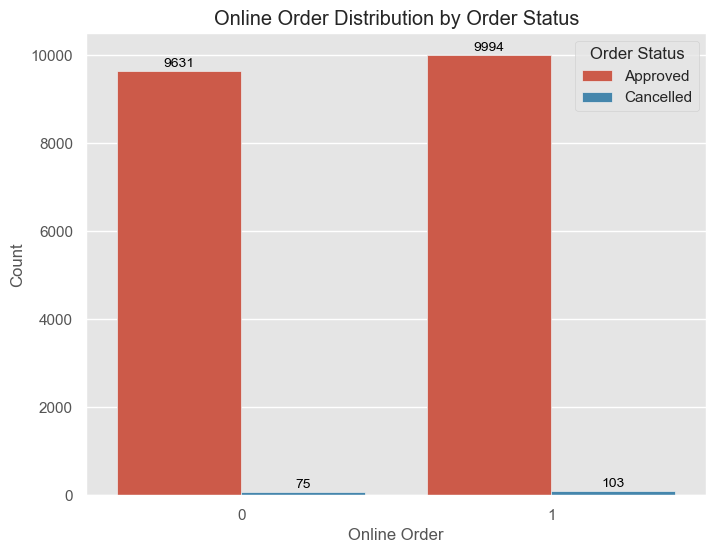

In [916]:
# Example of stacked bar plot for two categorical variables
plt.figure(figsize=(8, 6))
sns.countplot(data = transactions, x='online_order', hue='order_status')
plt.title('Online Order Distribution by Order Status')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.legend(title='Order Status')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

###  Scatter plots : used for understanding relationships between variables.

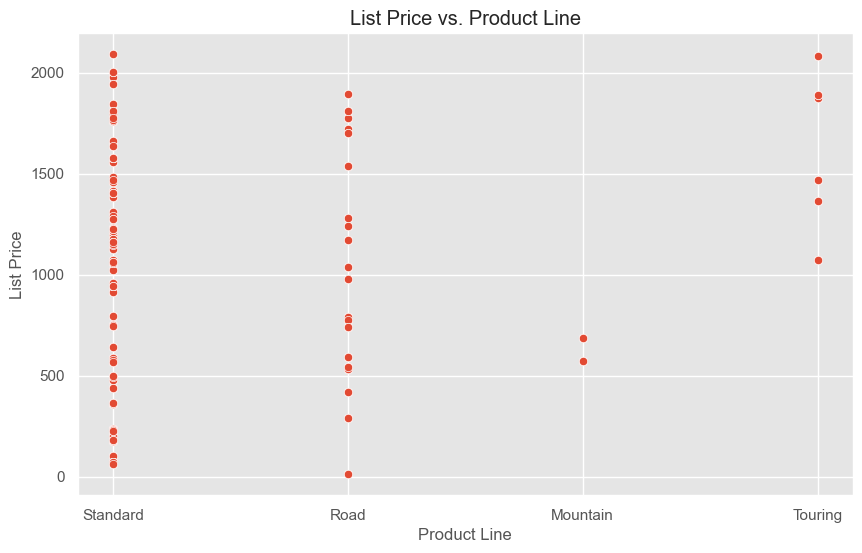

In [917]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = transactions, x='product_line', y='list_price')
plt.title('List Price vs. Product Line')
plt.xlabel('Product Line')
plt.ylabel('List Price')
plt.xticks()
plt.show()

### 2. New Customer List Table

###  Histogram : used to visualize the numerical features

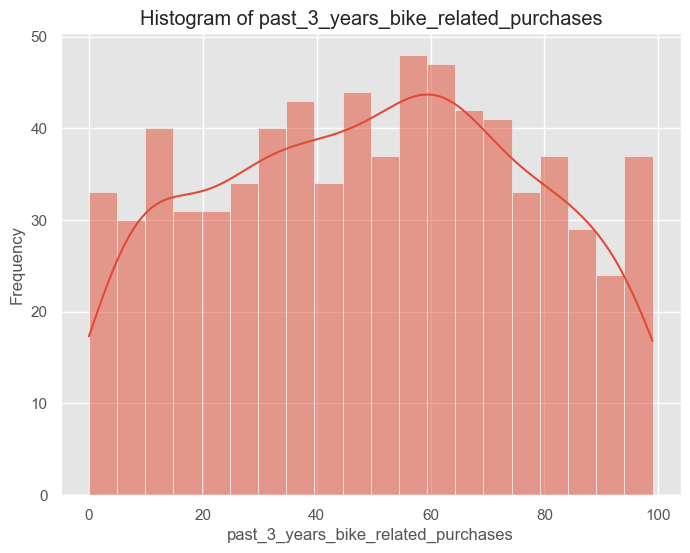

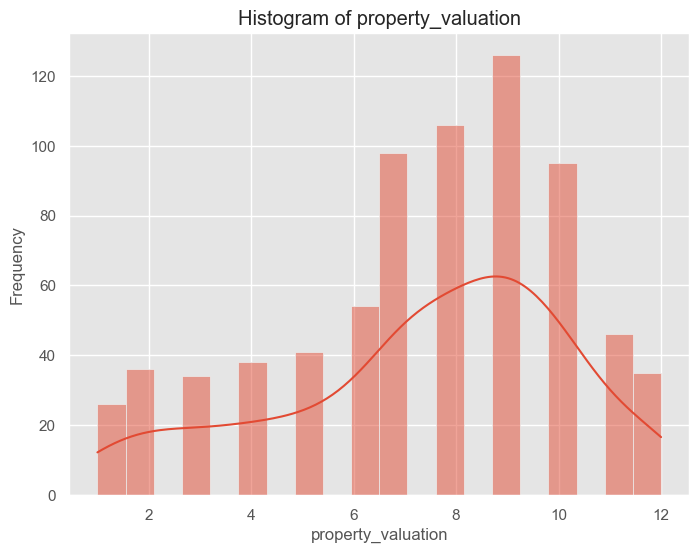

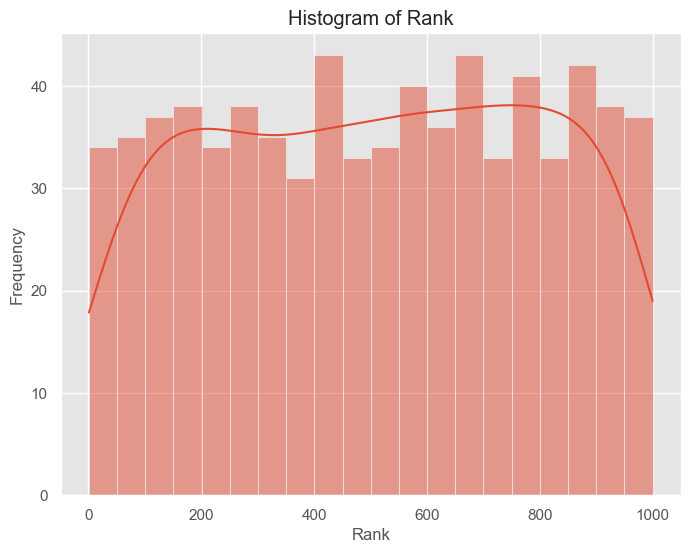

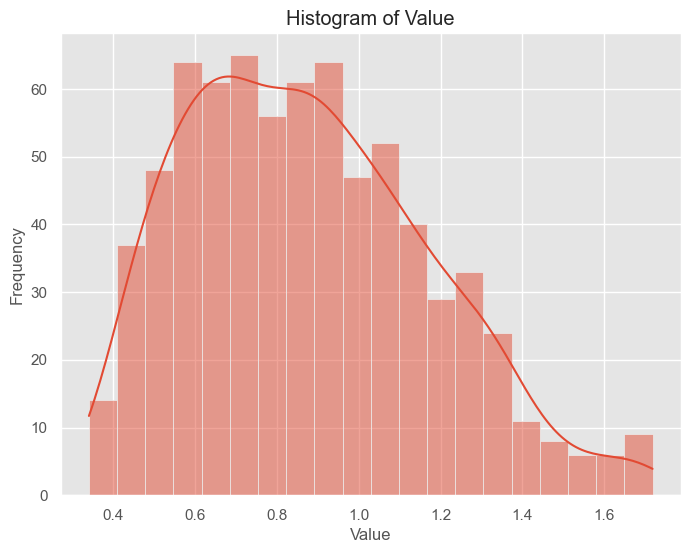

In [918]:
numerical_features = ['past_3_years_bike_related_purchases', 
                     'property_valuation', 'Rank', 'Value']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=new_customer_list[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


<Axes: xlabel='age'>

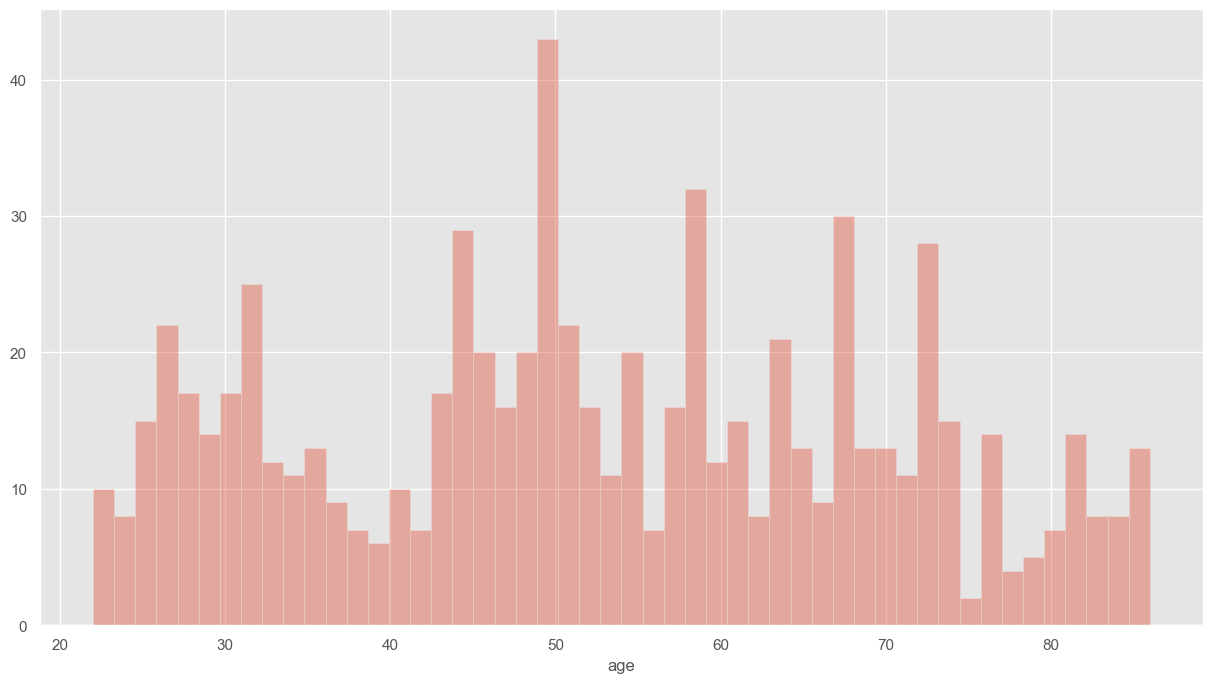

In [919]:
# find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_customer_list['age'], kde=False, bins=50)

### Count Plot : used to visualize the categorical features

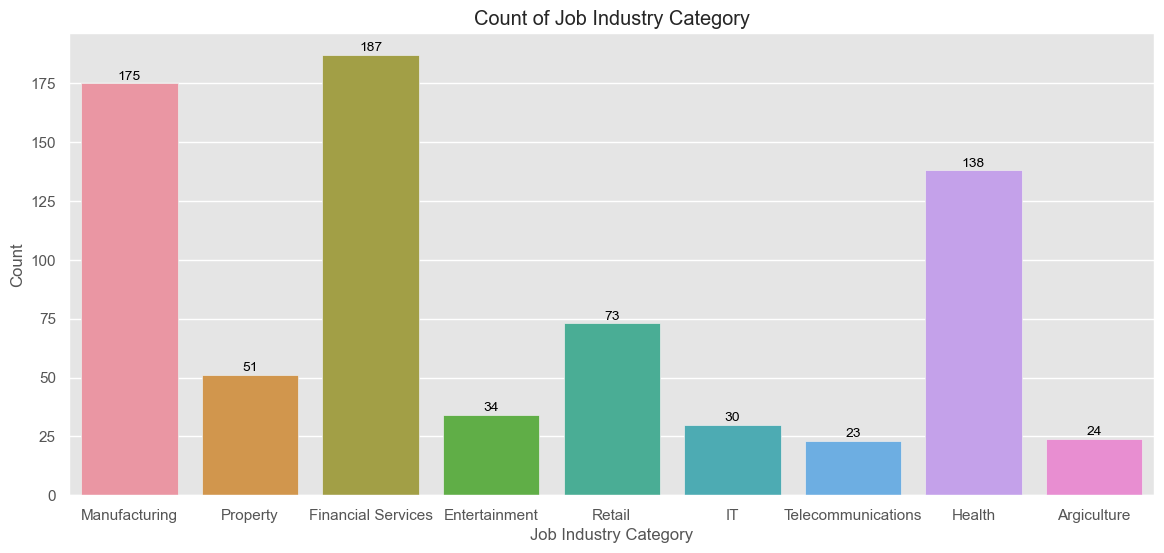

In [920]:
plt.figure(figsize=(14, 6))
sns.countplot(data=new_customer_list, x='job_industry_category')
plt.title('Count of Job Industry Category')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

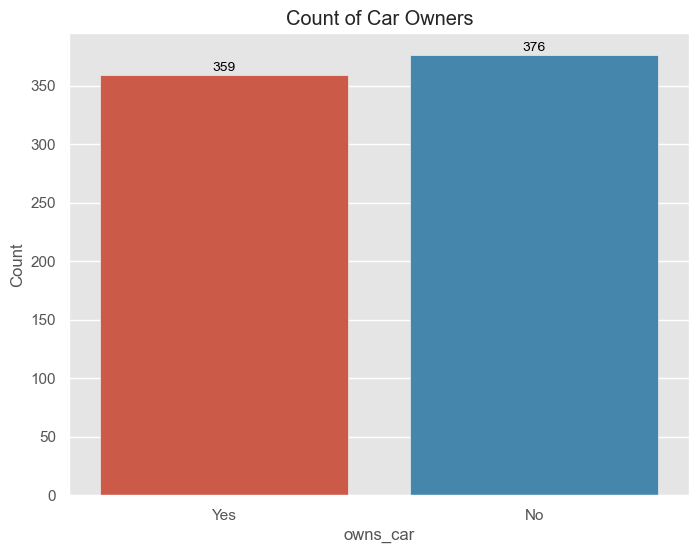

In [921]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_customer_list, x='owns_car')
plt.title('Count of Car Owners')
plt.xlabel('owns_car')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

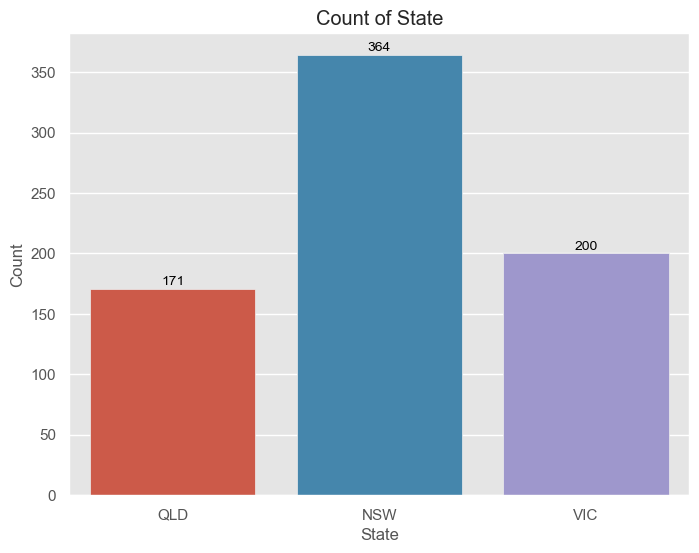

In [922]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_customer_list, x='state')
plt.title('Count of State')
plt.xlabel('State')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

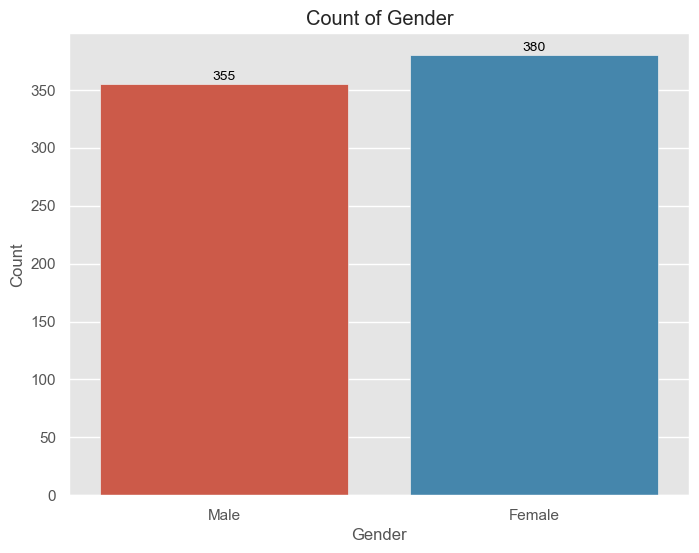

In [923]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_customer_list, x='gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

### Stacked Bar Plot

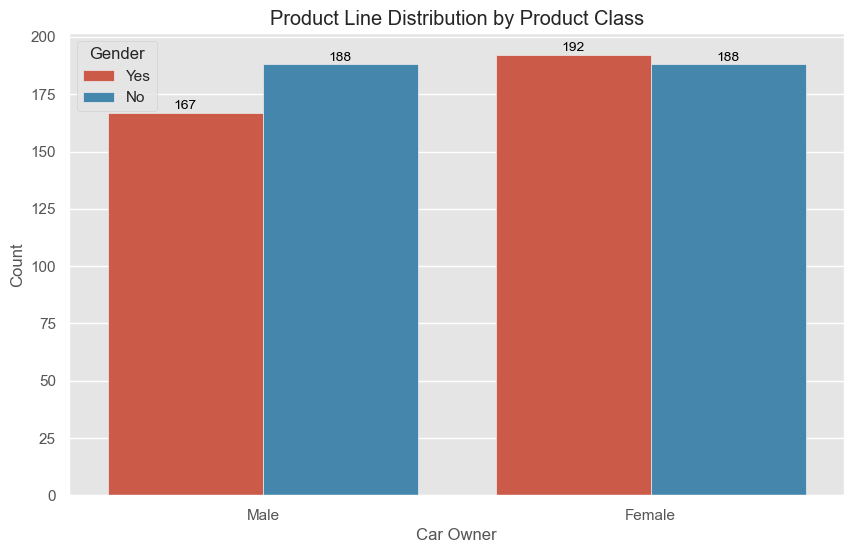

In [924]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_customer_list, x = 'gender', hue='owns_car')
plt.title('Product Line Distribution by Product Class')
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.legend(title='Gender')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

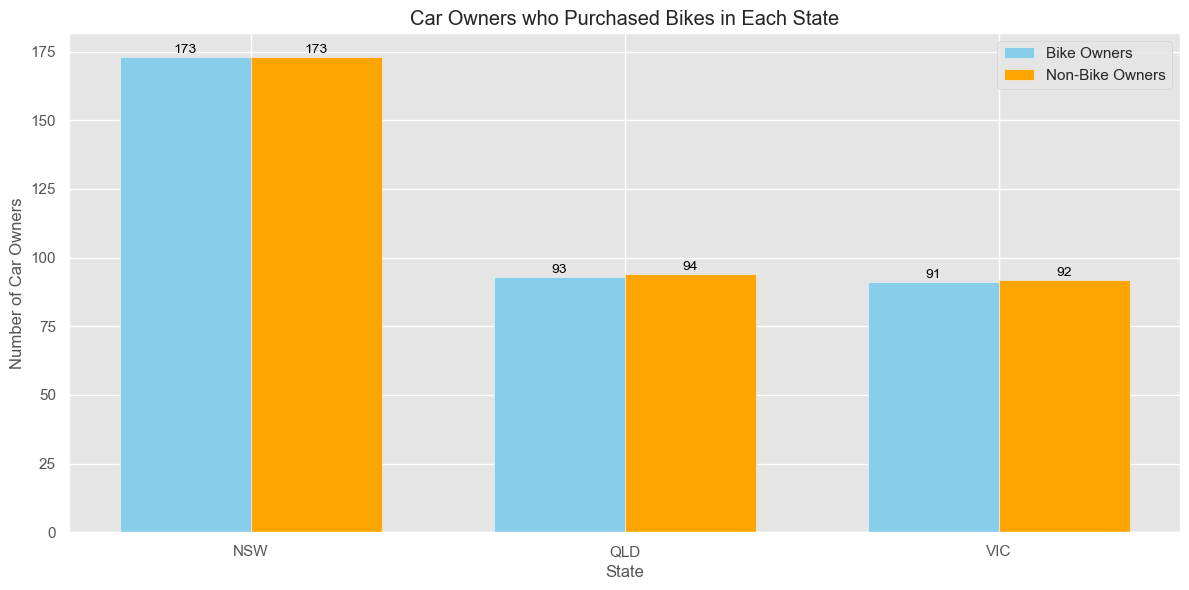

In [925]:
# Filter data for car owners who purchased bikes
bike_owners = new_customer_list[(new_customer_list['owns_car'] == 'Yes') & 
                                (new_customer_list['past_3_years_bike_related_purchases'] > 0)]

# Group data by state and count the number of bike owners and non-bike owners
bike_owners_by_state = bike_owners.groupby('state')['state'].count().reset_index(name='bike_owners_count')
non_bike_owners_by_state = new_customer_list[new_customer_list['state'].isin(bike_owners_by_state['state'])]
non_bike_owners_by_state = non_bike_owners_by_state[non_bike_owners_by_state['owns_car'] == 'Yes']
non_bike_owners_by_state = non_bike_owners_by_state.groupby('state')['state'].count().reset_index(name='non_bike_owners_count')

# Merge the two dataframes
merged_df = pd.merge(bike_owners_by_state, non_bike_owners_by_state, on='state', how='outer').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = merged_df.index
plt.bar(index, merged_df['bike_owners_count'], bar_width, color='skyblue', label='Bike Owners')
plt.bar(index + bar_width, merged_df['non_bike_owners_count'], bar_width, color='orange', label='Non-Bike Owners')

plt.xlabel('State')
plt.ylabel('Number of Car Owners')
plt.title('Car Owners who Purchased Bikes in Each State')
plt.xticks(index + bar_width / 2, merged_df['state'])
plt.legend()
plt.tight_layout()
# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()


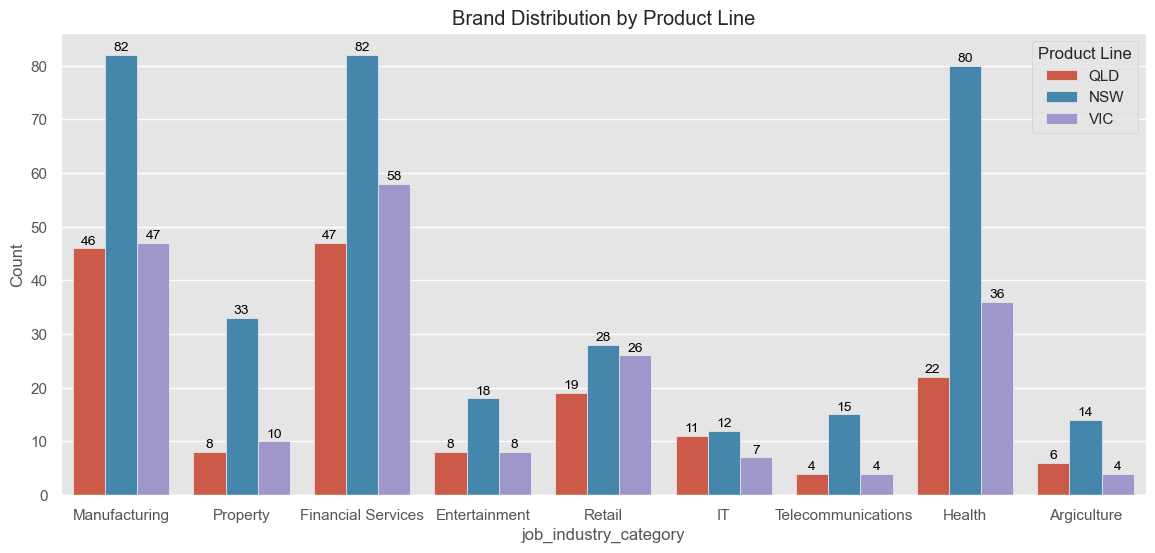

In [926]:
plt.figure(figsize=(14, 6))
sns.countplot(data=new_customer_list, x='job_industry_category', hue='state')
plt.title('Brand Distribution by Product Line')
plt.xlabel('job_industry_category')
plt.ylabel('Count')
plt.legend(title='Product Line')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

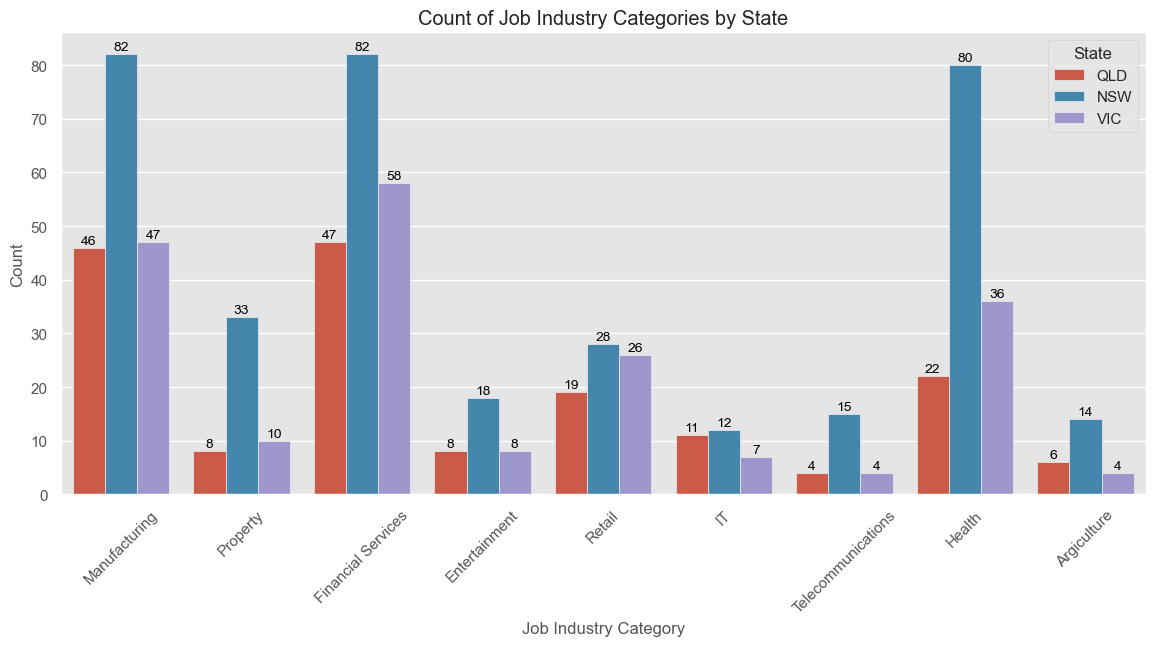

In [927]:
plt.figure(figsize=(14, 6))
sns.countplot(data=new_customer_list, x='job_industry_category', hue='state')
plt.title('Count of Job Industry Categories by State')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.legend(title='State')
plt.xticks(rotation=45)

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


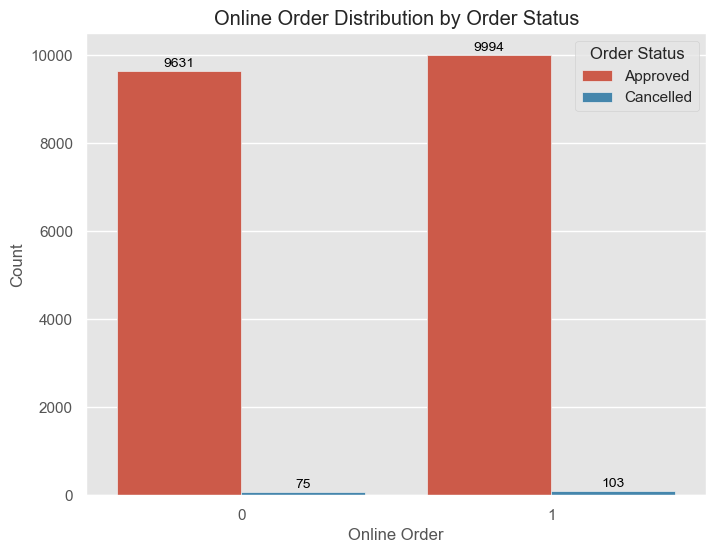

In [928]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transactions, x='online_order', hue='order_status')
plt.title('Online Order Distribution by Order Status')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.legend(title='Order Status')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

###  Scatter plots : used for understanding relationships between variables.

In [929]:
numerical_features = ['past_3_years_bike_related_purchases', 
                     'property_valuation', 'Rank', 'Value']

categorical_features = ['gender', 'state', 'job_industry_category', 'car_owners']

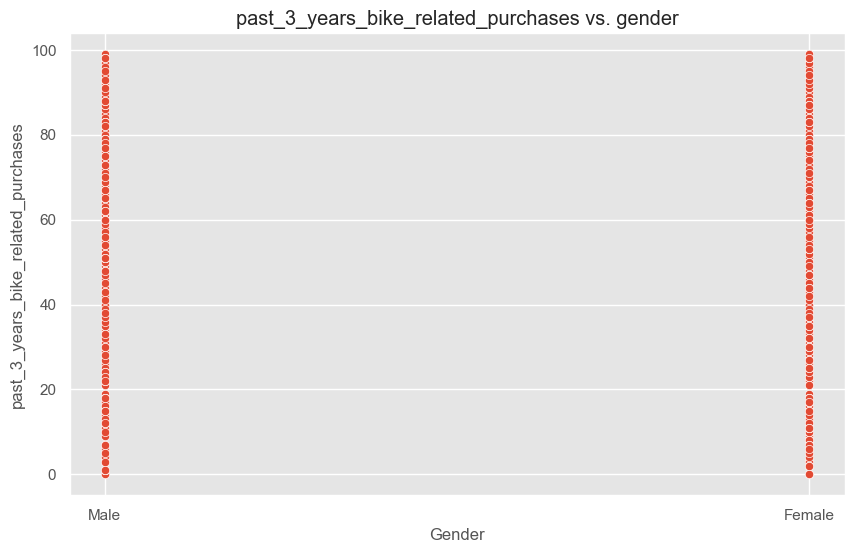

In [930]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = new_customer_list, x='gender', y='past_3_years_bike_related_purchases')
plt.title('past_3_years_bike_related_purchases vs. gender')
plt.xlabel('Gender')
plt.ylabel('past_3_years_bike_related_purchases')
plt.xticks() 
plt.show()

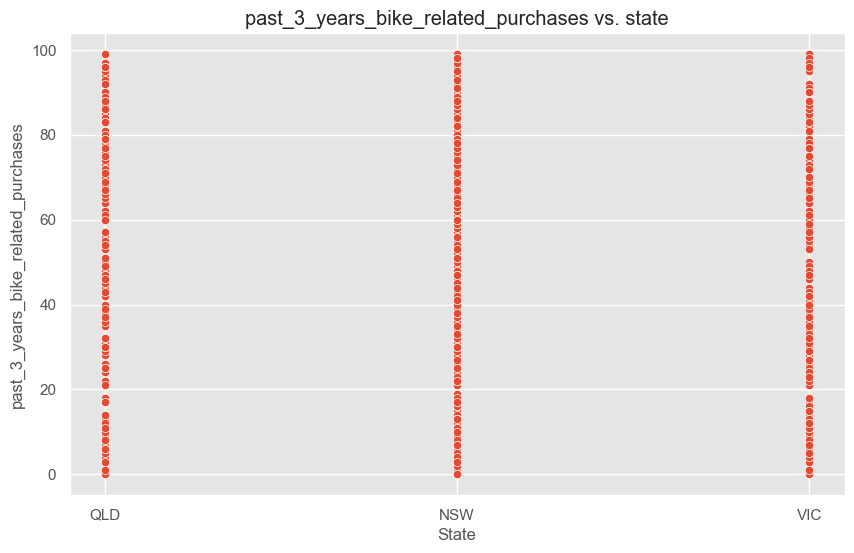

In [931]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = new_customer_list, x='state', y='past_3_years_bike_related_purchases')
plt.title('past_3_years_bike_related_purchases vs. state')
plt.xlabel('State')
plt.ylabel('past_3_years_bike_related_purchases')
plt.xticks() 
plt.show()

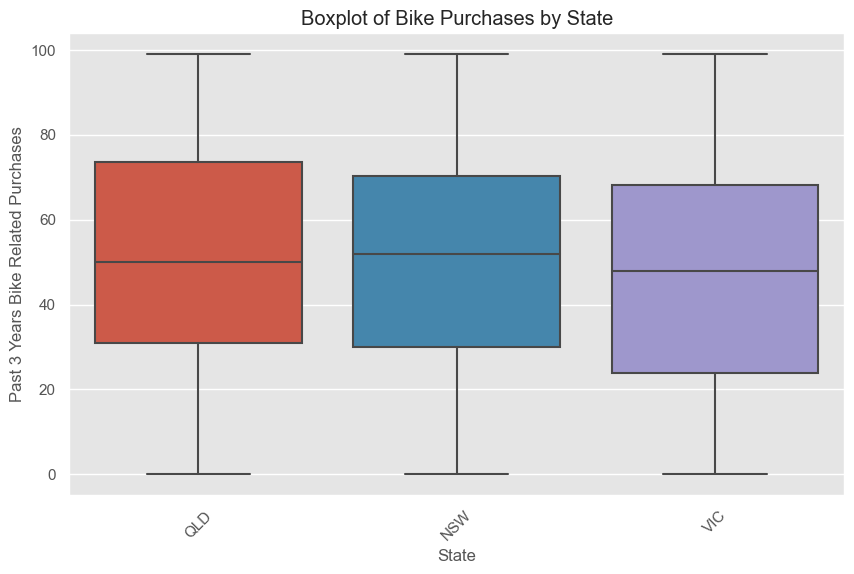

In [932]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_customer_list, x='state', y='past_3_years_bike_related_purchases')
plt.title('Boxplot of Bike Purchases by State')
plt.xlabel('State')
plt.ylabel('Past 3 Years Bike Related Purchases')
plt.xticks(rotation=45)
plt.show()

In [933]:
new_customer_list['past_3_years_bike_related_purchases'].value_counts().reset_index()

,past_3_years_bike_related_purchases,count
0,60,15
1,70,13
2,47,13
3,59,13
4,37,13
...,...,...
94,80,4
95,90,4
96,19,3
97,76,3


### 3. Customer Demographic Table

In [934]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2779 entries, 0 to 3996
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2779 non-null   int64         
 1   first_name                           2779 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2779 non-null   object        
 4   past_3_years_bike_related_purchases  2779 non-null   int64         
 5   DOB                                  2779 non-null   datetime64[ns]
 6   job_title                            2779 non-null   object        
 7   job_industry_category                2779 non-null   object        
 8   wealth_segment                       2779 non-null   object        
 9   deceased_indicator                   2779 non-null   object        
 10  owns_car         

### NOTE: Converting the datatype of the tenure column from float to int

In [935]:
customer_demographic['tenure'] = customer_demographic['tenure'].astype(int)

In [936]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,71,70-79
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,44,40-49
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,70,70-79
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,51,50-59
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,36,30-39


###  Histogram : used to visualize the numerical features

In [937]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2779 entries, 0 to 3996
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2779 non-null   int64         
 1   first_name                           2779 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2779 non-null   object        
 4   past_3_years_bike_related_purchases  2779 non-null   int64         
 5   DOB                                  2779 non-null   datetime64[ns]
 6   job_title                            2779 non-null   object        
 7   job_industry_category                2779 non-null   object        
 8   wealth_segment                       2779 non-null   object        
 9   deceased_indicator                   2779 non-null   object        
 10  owns_car         

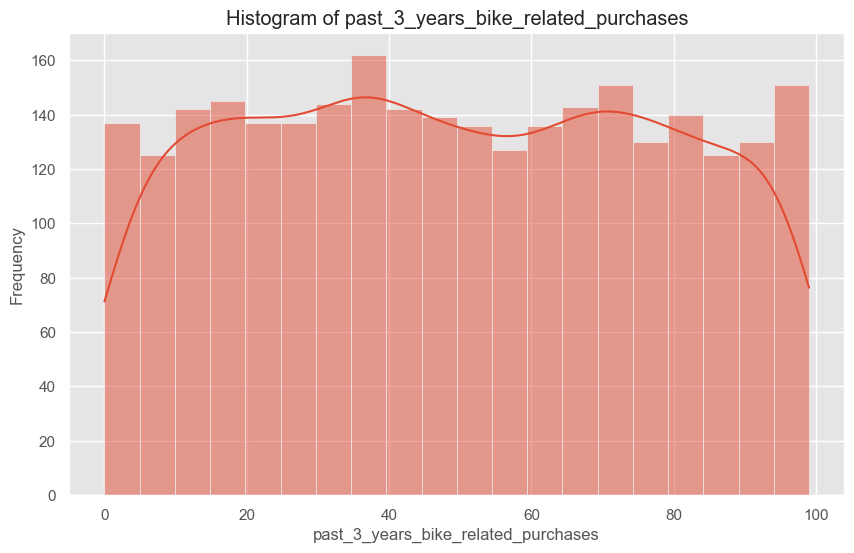

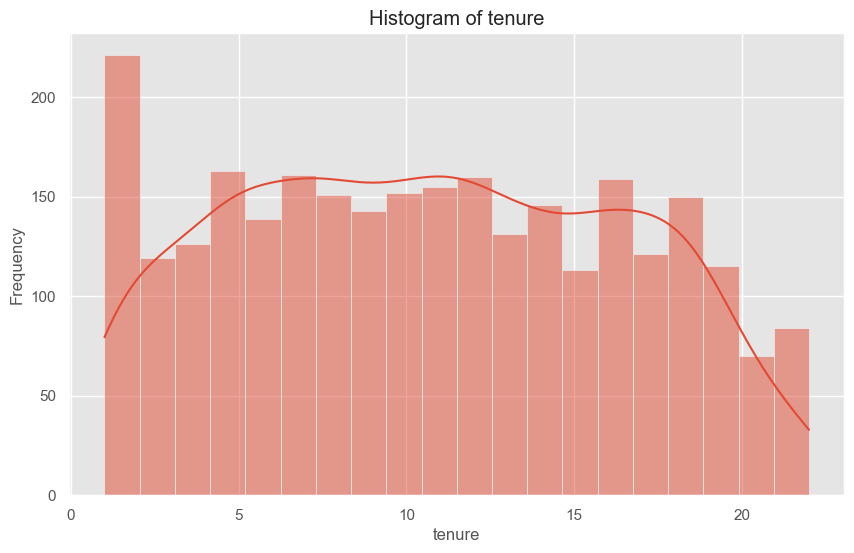

In [938]:
numerical_features = ['past_3_years_bike_related_purchases','tenure']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=customer_demographic[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


<Axes: xlabel='age'>

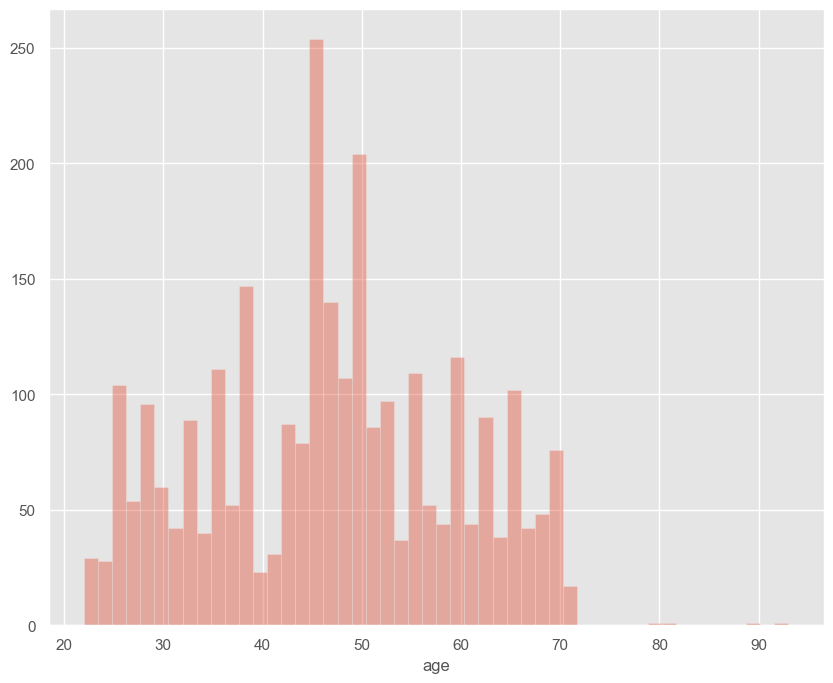

In [939]:
# Age Distribution
plt.figure(figsize=(10,8))
sns.distplot(customer_demographic['age'], kde=False, bins=50)

### Count Plot : used to visualize the categorical features

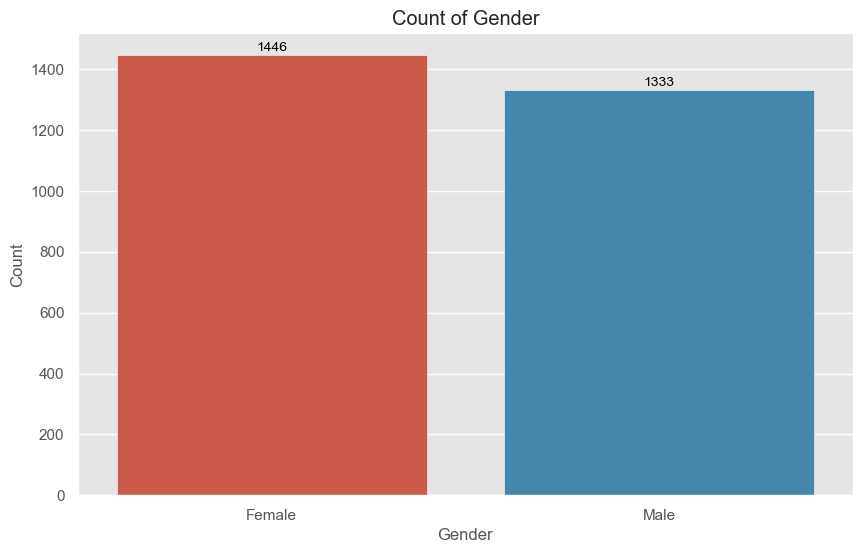

In [940]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_demographic, x='gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

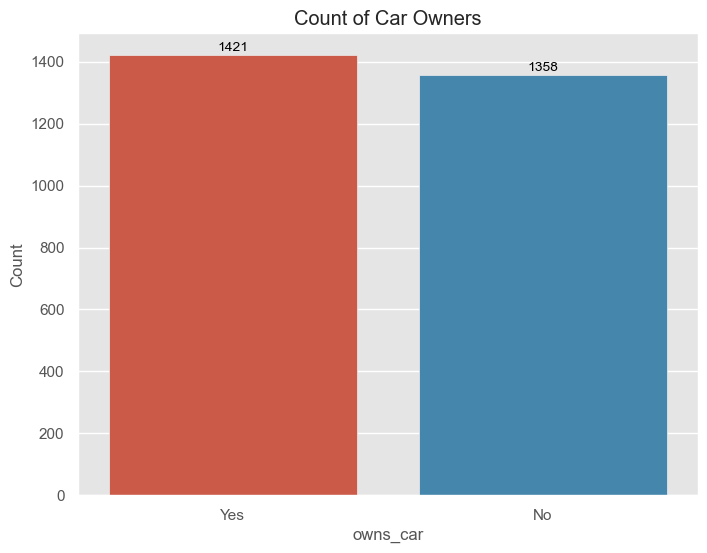

In [941]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_demographic, x='owns_car')
plt.title('Count of Car Owners')
plt.xlabel('owns_car')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

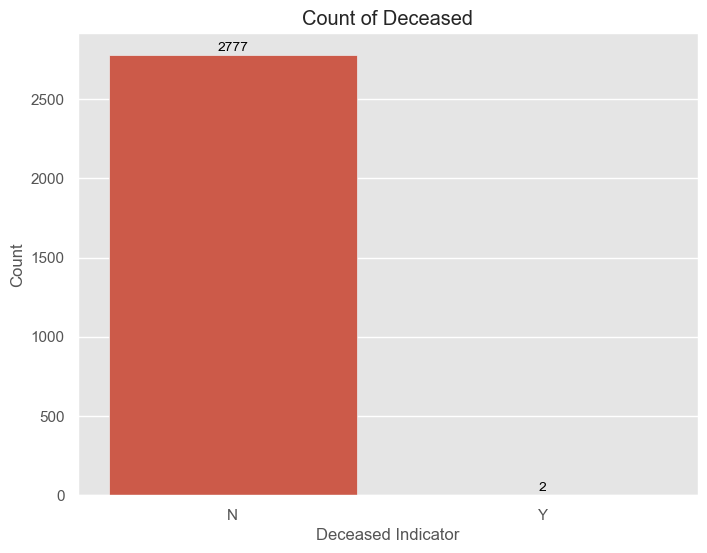

In [942]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_demographic, x='deceased_indicator')
plt.title('Count of Deceased')
plt.xlabel('Deceased Indicator')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

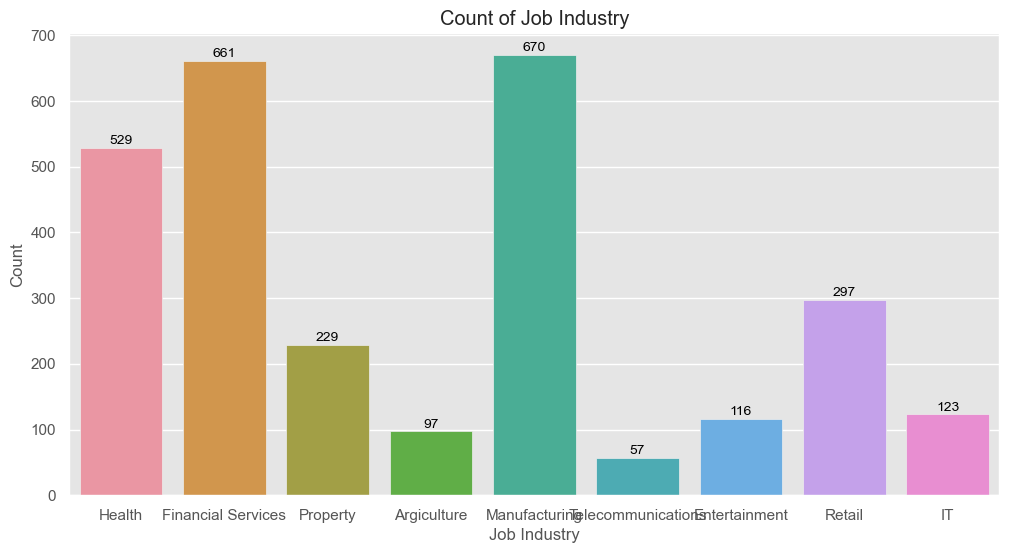

In [943]:
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_demographic, x ='job_industry_category')
plt.title('Count of Job Industry')
plt.xlabel('Job Industry')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

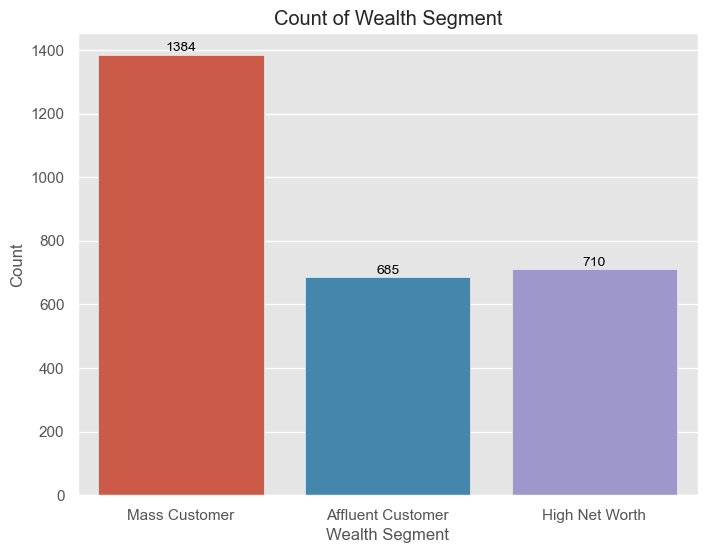

In [944]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_demographic, x='wealth_segment')
plt.title('Count of Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

###  Scatter plots : used for understanding relationships between variables.

In [945]:
numerical_features = ['past_3_years_bike_related_purchases', 
                     'DOB', 'tenure']

categorical_features = ['gender', 'owns_car', 'job_industry_category', 'job_title', 'wealth_segment']

### Converting age_group to a categorical type with an ordered category

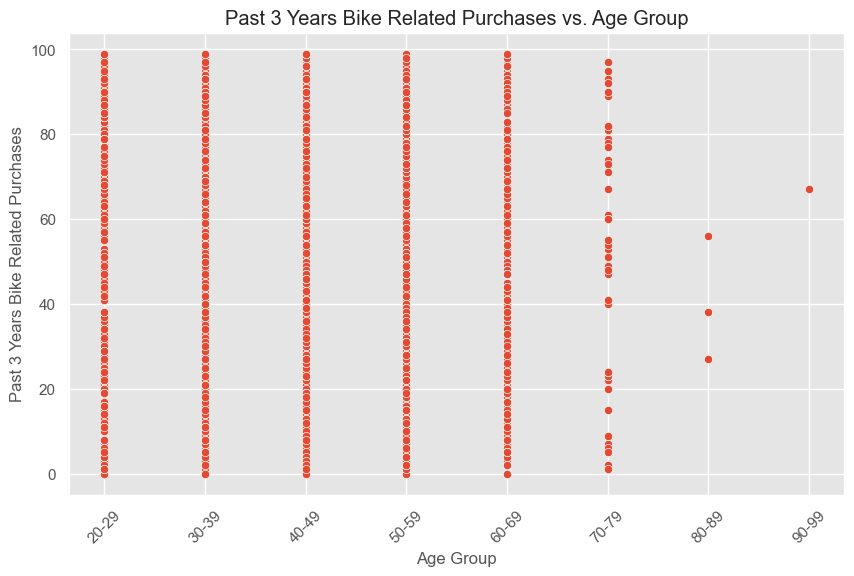

In [946]:
age_groups = sorted(customer_demographic['age_group'].unique(), key=lambda x: int(x.split('-')[0]))
customer_demographic['age_group'] = pd.Categorical(customer_demographic['age_group'], categories=age_groups, ordered=True)

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_demographic, x='age_group', y='past_3_years_bike_related_purchases')
plt.title('Past 3 Years Bike Related Purchases vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Past 3 Years Bike Related Purchases')
plt.xticks(rotation=45)  # Optional: rotate x-tick labels for better readability
plt.show()

### d. Customer Address Table

###  Histogram : used to visualize the numerical features

In [947]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


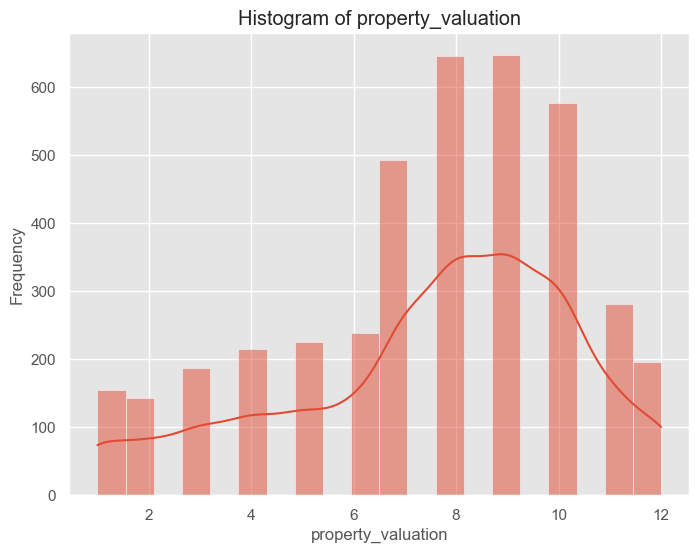

In [948]:
numerical_features = ['property_valuation']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=customer_address[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### Count Plot : used to visualize the categorical features

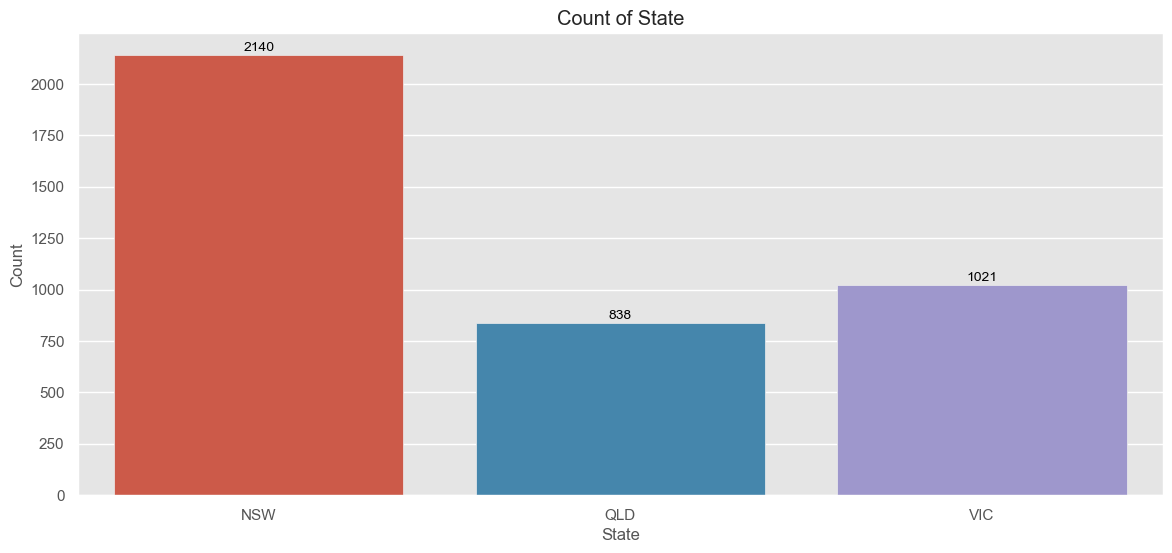

In [949]:
plt.figure(figsize=(14, 6))
sns.countplot(data=customer_address, x='state')
plt.title('Count of State')
plt.xlabel('State')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# Task 2 : Data Preprocessing

## 1. Handling Outliers

### a. Transaction Table

### To do this: Use boxplot

In [950]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  int32         
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 non-nu

In [951]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,transaction_month
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87,February
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55,May
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61,October
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36,August
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82,October


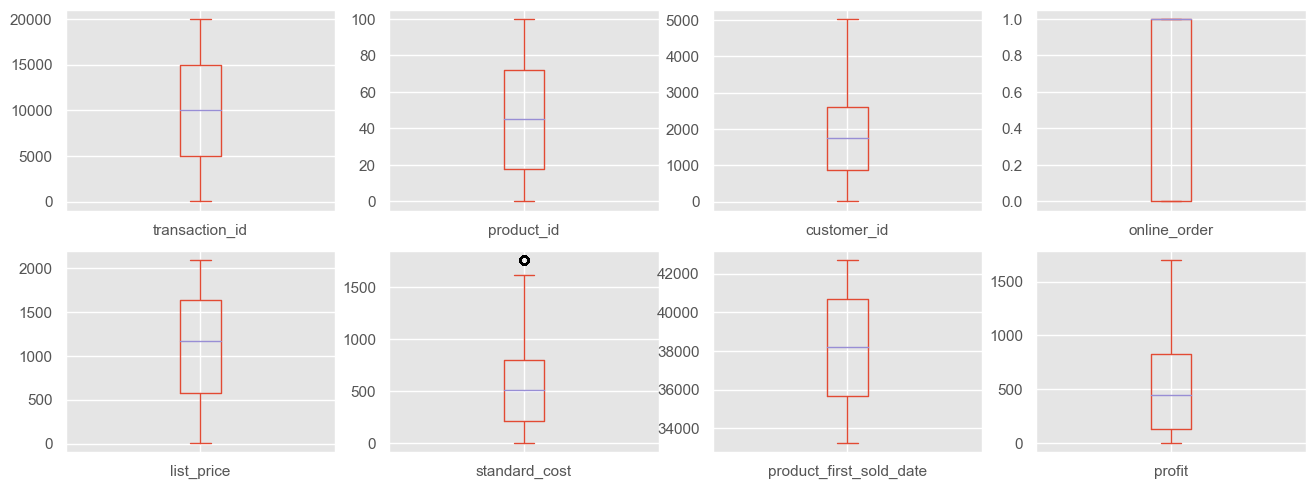

In [952]:
# box (subplots) helps to identify outliers
transactions.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16,12))
plt.show()

### b. New Customer List Table

In [953]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure             

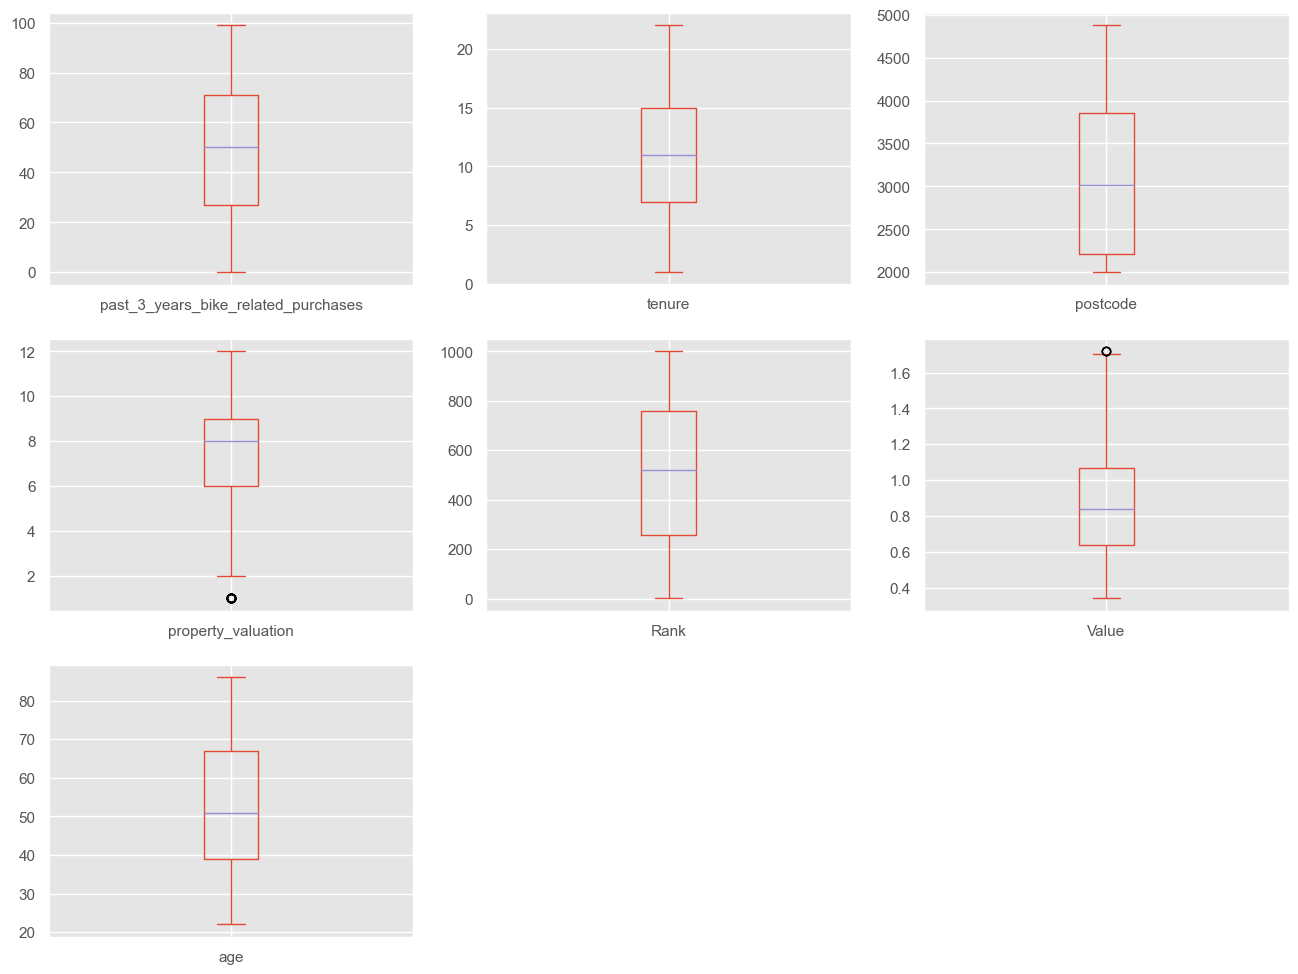

In [954]:
# box (subplots) helps to identify outliers
new_customer_list.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(16,12))
plt.show()

In [955]:
new_customer_list['property_valuation'].unique()

array([ 6, 11,  5,  1,  9,  7, 10,  8,  2, 12,  4,  3], dtype=int64)

### c. Customer Demographic Table

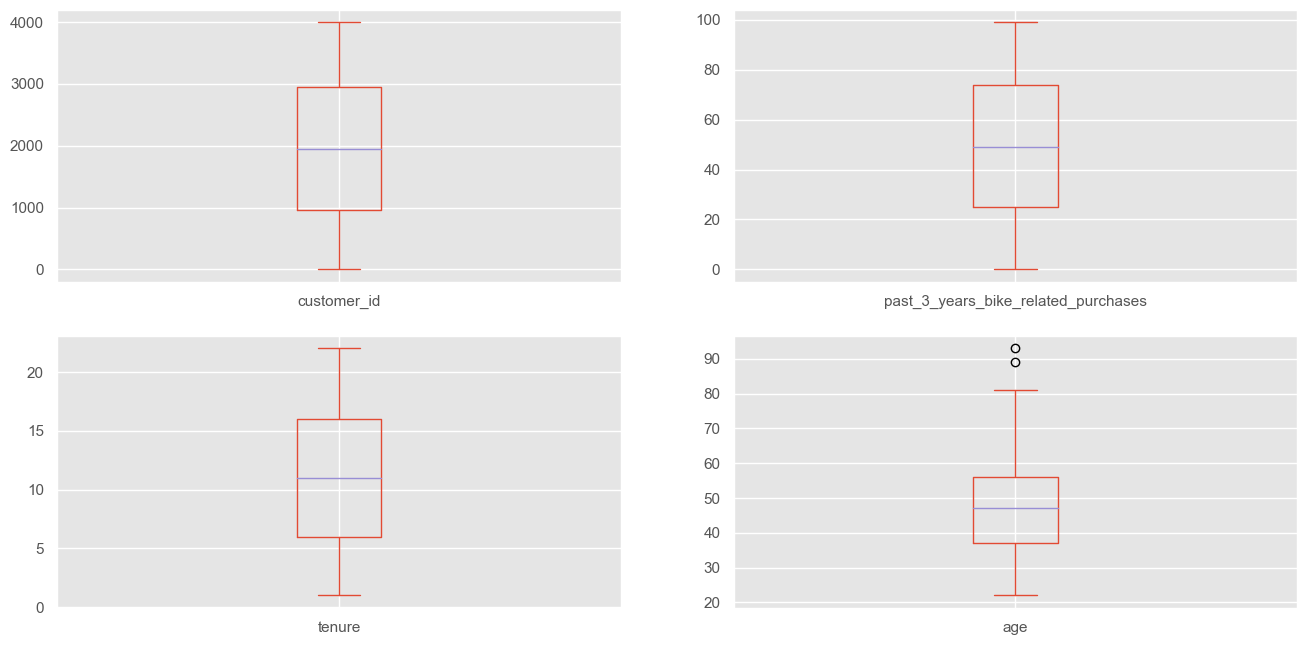

In [956]:
# box (subplots) helps to identify outliers
customer_demographic.plot(kind='box', subplots=True, layout=(3, 2), sharex=False, sharey=False, figsize=(16,12))
plt.show()

In [957]:
customer_demographic['age'].value_counts().reset_index()

,age,count
0,46,161
1,47,140
2,50,117
3,48,107
4,45,93
5,49,87
6,51,86
7,38,84
8,44,79
9,65,68


### d. Customer Address Table

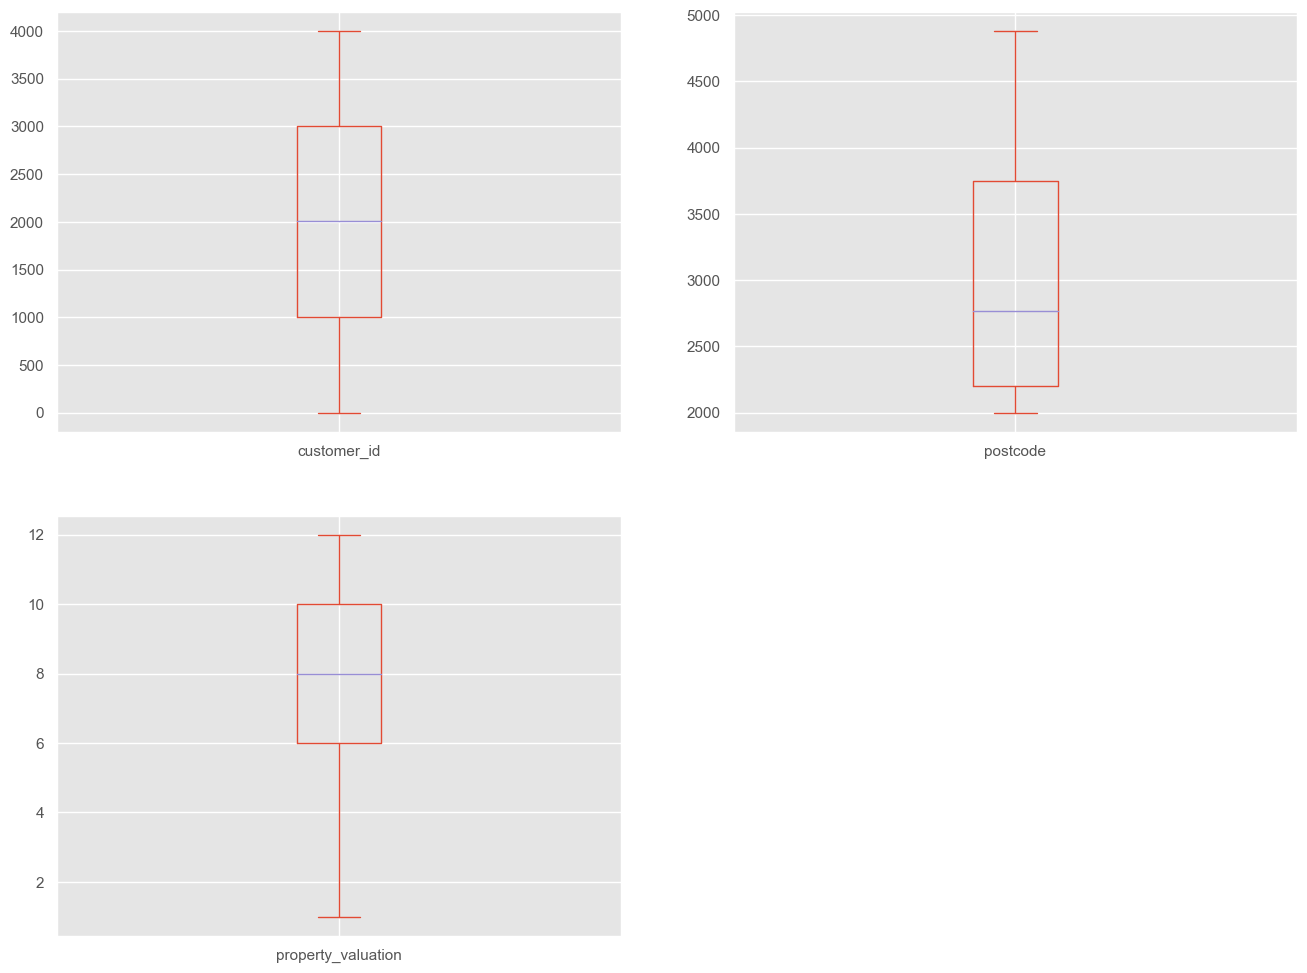

In [958]:
# box (subplots) helps to identify outliers
customer_address.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(16,12))
plt.show()

## Data Merging

In [959]:
# Merging the Transaction, Customer Demographic and Customer Address Tables based on customer_id and renaming as old_customer_list 

In [960]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'transaction_month'],
      dtype='object')

In [961]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group'],
      dtype='object')

In [962]:
customer_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [963]:
# List of DataFrames to be merged
tables = [transactions, customer_demographic, customer_address]

In [964]:
# Merging all tables on 'customer_id' using inner join 
merged_tables = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='inner'), tables)

In [965]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13869 entries, 0 to 13868
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13869 non-null  int64         
 1   product_id                           13869 non-null  int64         
 2   customer_id                          13869 non-null  int64         
 3   transaction_date                     13869 non-null  datetime64[ns]
 4   online_order                         13869 non-null  int32         
 5   order_status                         13869 non-null  object        
 6   brand                                13869 non-null  object        
 7   product_line                         13869 non-null  object        
 8   product_class                        13869 non-null  object        
 9   product_size                         13869 non-null  object        
 10  list_price

In [966]:
merged_tables.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'transaction_month', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'age_group',
       'address', 'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [967]:
merged_tables.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,N,Yes,10,69,60-69,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,10,69,60-69,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,...,N,Yes,10,69,60-69,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10,45,40-49,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,...,N,Yes,10,45,40-49,4 Shopko Circle,2196,NSW,Australia,5


## Grouping each customer id by their unique properies

In [968]:
grouped_data = merged_tables.groupby('customer_id').agg({
    'brand': lambda x: x.value_counts().index[0],  # Most common brand per customer
    'product_line': lambda x: x.value_counts().index[0],  # Most common product line per customer
    'product_class': lambda x: x.value_counts().index[0],  # Most common product class per customer
    'product_size': lambda x: x.value_counts().index[0],  # Most common product size per customer
    'job_title': 'first',  # First occurrence of job_title per customer
    'job_industry_category': 'first',  # First occurrence of job_industry_category per customer
    'wealth_segment': 'first',  # First occurrence of wealth_segment per customer
    'gender': 'first',  # First occurrence of gender per customer
    'state': 'first',  # First occurrence of state per customer
    'profit': 'sum',  # Total profit per customer
    'age': 'first',  # Age of the customer
    'age_group': lambda x: x.value_counts().idxmax(),  # Most common age group per customer
    'list_price': sum
})

In [969]:
grouped_data.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,age,age_group,list_price
customer_id,,,,,,,,,,,,,
1,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,71,70-79,9084.45
2,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,44,40-49,4149.07
9,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,51,50-59,5357.55
12,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,30,30-39,6394.21
13,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,69,60-69,7734.74


In [970]:
grouped_data = grouped_data.reset_index()

In [971]:
grouped_data.head()

,customer_id,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,age,age_group,list_price
0,1,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,71,70-79,9084.45
1,2,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,44,40-49,4149.07
2,9,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,51,50-59,5357.55
3,12,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,30,30-39,6394.21
4,13,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,69,60-69,7734.74


In [972]:
grouped_data.shape

(2448, 14)

In [973]:
grouped_data['customer_id'].duplicated().sum()

0

In [974]:
grouped_data['customer_id'].nunique()

2448

## Checking for null values

In [975]:
grouped_data.isnull().sum()

customer_id              0
brand                    0
product_line             0
product_class            0
product_size             0
job_title                0
job_industry_category    0
wealth_segment           0
gender                   0
state                    0
profit                   0
age                      0
age_group                0
list_price               0
dtype: int64

## Performing RFM Analysis

In [976]:
grouped_data.columns

Index(['customer_id', 'brand', 'product_line', 'product_class', 'product_size',
       'job_title', 'job_industry_category', 'wealth_segment', 'gender',
       'state', 'profit', 'age', 'age_group', 'list_price'],
      dtype='object')

In [977]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'transaction_month'],
      dtype='object')

In [978]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(transactions['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [979]:
# Taking the last transaction date as a reference date for comparison and finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2017, 12, 30, 0, 0)

## Creating a RFM table that contains all the values for recency, frequency and monetary data. 

In [980]:
rfm_data = transactions.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda product_id : len(product_id), 
                                                            'profit' : lambda profit : sum(profit)})

In [981]:
# Renaming column names to appropriate names

rfm_data.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'profit' : 'monetary'} , inplace=True)

In [982]:
# Check the unique values in the columns

In [983]:
print("Unique values in 'recency':", rfm_data['recency'].unique())
print("Unique values in 'frequency':", rfm_data['frequency'].unique())
print("Unique values in 'monetary':", rfm_data['monetary'].unique())


Unique values in 'recency': [  7 128 102 195  16  64 253  22  78  43  46  67  27  47  35  99   0 134
  31   6  97  10  17   5 259 143  83  11  89 138  38  92 163  50  34  14
  29 111  61  53  82  36  26  55   4   2  20 200  68   3 136 116  84 131
 168  28  60   1 101 211  80  37  18  74  30   9  79  33  70 122   8  42
  49  81 147 175  12  69 129 191  23 137 178  76 205 115 159  13 194  75
 158 135  65  66  93  98 114 198  63 100  15  32  40 105  24 108 146  58
  52  77 279 107  39 187  56  45 141  88 112  62  41  57  48 130 202  91
 149 132  21 248 133  44 156 276 123  25  51  71 161 263 103  19  59 125
 166 223 124 145  85 113 106 167 109 297 188 142 169  94 139 155  95 261
 154 119 162  73 173 152 165 181 104  72 277 199  90 221 184 206 308 266
  54 197 157 110  86 255  87 148 210 245  96 182 174 328 150 140 121 293
 171 189 272 295 170 192 177 321 203 126 242 226 179 232 204 151 208 117
 164 153 218 234 256 257 239 176 240 231 118 217 215 237 160 120 329 216
 281 280 127 258 286 19

In [984]:
rfm_data.head(10)

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55
7,253,3,220.11
8,22,10,7066.94
9,78,6,2353.11


## Deriving quartiles for recency

In [985]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help to calculate RFM score for a customer and classify based on their RFM score.

In [986]:
if len(rfm_data['recency'].unique()) < 4:
    r_quartile, recency_bins = pd.cut(rfm_data['recency'], bins=4, labels=['4', '3', '2', '1'], duplicates='drop', retbins=True)
    rfm_data['r_quartile'] = r_quartile
else:
    r_quartile, recency_bins = pd.qcut(rfm_data['recency'], 4, labels=['4', '3', '2', '1'], duplicates='drop', retbins=True)
    rfm_data['r_quartile'] = r_quartile

# Deriving quartiles for frequency
if len(rfm_data['frequency'].unique()) < 4:
    f_quartile, frequency_bins = pd.cut(rfm_data['frequency'], bins=4, labels=['1', '2', '3', '4'], duplicates='drop', retbins=True)
    rfm_data['f_quartile'] = f_quartile
else:
    f_quartile, frequency_bins = pd.qcut(rfm_data['frequency'], 4, labels=['1', '2', '3', '4'], duplicates='drop', retbins=True)
    rfm_data['f_quartile'] = f_quartile

# Deriving quartiles for monetary
if len(rfm_data['monetary'].unique()) < 4:
    m_quartile, monetary_bins = pd.cut(rfm_data['monetary'], bins=4, labels=['1', '2', '3', '4'], duplicates='drop', retbins=True)
    rfm_data['m_quartile'] = m_quartile
else:
    m_quartile, monetary_bins = pd.qcut(rfm_data['monetary'], 4, labels=['1', '2', '3', '4'], duplicates='drop', retbins=True)
    rfm_data['m_quartile'] = m_quartile

In [987]:
rfm_data.isnull().sum()

recency       0
frequency     0
monetary      0
r_quartile    0
f_quartile    0
m_quartile    0
dtype: int64

## Calculating rfm score

In [988]:
# Max weightage is given to recency then frequency and then monetary.

rfm_data['rfm_score'] = 100*rfm_data['r_quartile'].astype(int)+10*rfm_data['f_quartile'].astype(int)+rfm_data['m_quartile'].astype(int)

In [989]:
rfm_data = rfm_data.reset_index()

In [990]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1,7,11,3018.09,4,4,3,443
1,2,128,3,2226.26,1,1,2,112
2,3,102,8,3362.81,1,4,3,143
3,4,195,2,220.57,1,1,1,111
4,5,16,6,2394.94,4,2,2,422


In [991]:
rfm_data.shape

(3494, 8)

In [992]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1,7,11,3018.09,4,4,3,443
1,2,128,3,2226.26,1,1,2,112
2,3,102,8,3362.81,1,4,3,143
3,4,195,2,220.57,1,1,1,111
4,5,16,6,2394.94,4,2,2,422


In [993]:
rfm_data['customer_id'].duplicated().sum()

0

In [994]:
rfm_data['customer_id'].nunique()

3494

In [995]:
rfm_data.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'r_quartile',
       'f_quartile', 'm_quartile', 'rfm_score'],
      dtype='object')

In [996]:
rfm_data.shape

(3494, 8)

## Merging grouped_data with rfm_data

In [997]:
old_customer_list = pd.merge(grouped_data, rfm_data, on='customer_id', how='inner')

In [998]:
old_customer_list.head()

,customer_id,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,...,age,age_group,list_price,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,...,71,70-79,9084.45,7,11,3018.09,4,4,3,443
1,2,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,...,44,40-49,4149.07,128,3,2226.26,1,1,2,112
2,9,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,...,51,50-59,5357.55,78,6,2353.11,2,2,2,222
3,12,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,...,30,30-39,6394.21,67,7,3540.03,2,3,3,233
4,13,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,...,69,60-69,7734.74,27,7,4337.38,3,3,4,334


In [999]:
old_customer_list.shape

(2448, 21)

In [1000]:
old_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   customer_id            2448 non-null   int64   
 1   brand                  2448 non-null   object  
 2   product_line           2448 non-null   object  
 3   product_class          2448 non-null   object  
 4   product_size           2448 non-null   object  
 5   job_title              2448 non-null   object  
 6   job_industry_category  2448 non-null   object  
 7   wealth_segment         2448 non-null   object  
 8   gender                 2448 non-null   object  
 9   state                  2448 non-null   object  
 10  profit                 2448 non-null   float64 
 11  age                    2448 non-null   int32   
 12  age_group              2448 non-null   object  
 13  list_price             2448 non-null   float64 
 14  recency                2448 non-null   i

In [1001]:
final_old_customer_list = old_customer_list.copy()

In [1002]:
final_old_customer_list.head()

,customer_id,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,...,age,age_group,list_price,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,...,71,70-79,9084.45,7,11,3018.09,4,4,3,443
1,2,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,...,44,40-49,4149.07,128,3,2226.26,1,1,2,112
2,9,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,...,51,50-59,5357.55,78,6,2353.11,2,2,2,222
3,12,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,...,30,30-39,6394.21,67,7,3540.03,2,3,3,233
4,13,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,...,69,60-69,7734.74,27,7,4337.38,3,3,4,334


In [1003]:
final_old_customer_list.drop(columns = ['customer_id'], inplace = True)

## Label Encoding 

In [1004]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
encoded_final_old_customer_list = final_old_customer_list.copy()  # Make a copy of the original data

for column in final_old_customer_list:  # Replace categorical_columns with your list of categorical columns
    encoded_final_old_customer_list[column] = label_encoder.fit_transform(encoded_final_old_customer_list[column])

# Now, encoded_final_old_customer_list contains the label encoded data

In [1005]:
encoded_final_old_customer_list.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,age,age_group,list_price,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,0,2,2,1,71,3,2,0,0,1297,49,5,2021,7,10,1296,3,3,2,59
1,5,2,2,1,19,2,2,1,0,822,22,2,596,128,2,822,0,0,1,1
2,3,2,2,1,38,0,0,0,0,902,29,3,1000,78,5,902,1,1,1,19
3,1,2,2,1,106,5,2,1,1,1563,8,1,1349,67,6,1562,1,2,2,24
4,3,2,2,1,58,2,1,1,2,1887,47,4,1728,27,6,1886,2,2,3,41


## Modelling

In [1006]:
X = encoded_final_old_customer_list

## Standardize the data

In [1007]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1008]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

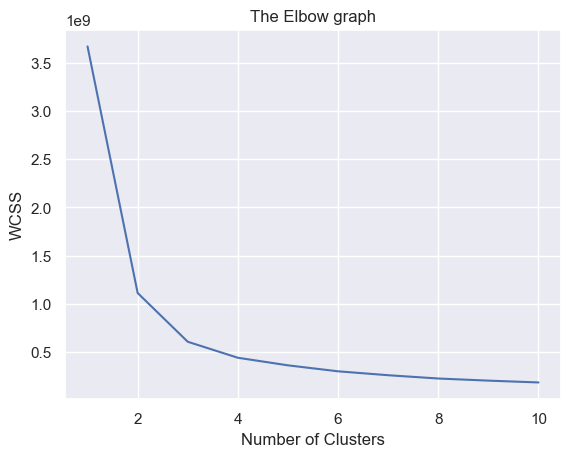

In [1009]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [1010]:
# Fit KMeans with n = 4
kmeans_4 = KMeans(n_clusters = 4, random_state=42)
labels_4 = kmeans_4.fit_predict(X)

In [1011]:
# Calculate metrics
silhouette_avg_4 = silhouette_score(X, labels_4)
davies_bouldin_avg_4 = davies_bouldin_score(X, labels_4)
calinski_harabasz_avg_4 = calinski_harabasz_score(X, labels_4)

print(f"Silhouette Score: {silhouette_avg_4}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg_4}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg_4}")

Silhouette Score: 0.4355223969553626
Davies-Bouldin Index: 0.7918594764502607
Calinski-Harabasz Index: 5991.197837345404


## Interpretation
### Silhouette Score
- The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- A score closer to 1 indicates that the clusters are dense and well-separated, with a clear distinction between them.
- A Silhouette score of 0.436 indicates reasonably well-separated clusters, with a good balance between intra-cluster cohesion and inter-cluster separation.
### Davies-Bouldin Index
- The Davies-Bouldin index is the average similarity measure of each cluster with its most similar cluster.
- Lower values indicate better clustering, with a score of 0 indicating perfect clustering.
- It assesses the compactness and separation between clusters, where lower values indicate better-defined clusters.
- The Davies-Bouldin index score of 0.792 suggests that the clusters are relatively well-separated and compact, with low intra-cluster variance compared to inter-cluster variance.
### Calinski-Harabasz Index
- The Calinski-Harabasz index, also known as the Variance Ratio Criterion, evaluates cluster density and separation.
- Higher values of this index indicate better-defined, dense, and well-separated clusters.
- A Calinski-Harabasz index of 5991.20 further supports the notion of well-defined clusters with high intra-cluster similarity and low inter-cluster similarity.

In [1012]:
# Convert X back to a DataFrame and add the cluster labels
encoded_final_old_customer_list['Cluster'] = labels_4

In [1013]:
# Profile clusters
X['Cluster'] = labels_4
cluster_sizes = X['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
0    630
3    621
2    612
1    585
Name: count, dtype: int64


In [1014]:
cluster_profiles = X.groupby('Cluster').mean()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
            brand  product_line  product_class  product_size  job_title  \
Cluster                                                                   
0        2.623810      1.949206       1.882540      0.936508  98.909524   
1        2.364103      1.827350       1.656410      1.042735  97.386325   
2        2.750000      1.988562       1.947712      0.897059  93.308824   
3        2.475040      1.895330       1.806763      0.943639  98.510467   

         job_industry_category  wealth_segment    gender     state  \
Cluster                                                              
0                     3.849206        1.276190  0.452381  0.728571   
1                     3.818803        1.230769  0.476923  0.729915   
2                     3.828431        1.235294  0.526144  0.715686   
3                     3.935588        1.241546  0.499195  0.700483   

              profit        age  age_group   list_price    recency  frequency  \
Cluster                      

In [1015]:
# Adding the cluster labels to the original DataFrame (final_old_customer_list)
final_old_customer_list = final_old_customer_list.copy()  # Make a copy to avoid modifying the original DataFrame
final_old_customer_list['Cluster'] = labels_4

In [1016]:
final_old_customer_list.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,...,age_group,list_price,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Cluster
0,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,...,70-79,9084.45,7,11,3018.09,4,4,3,443,0
1,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,...,40-49,4149.07,128,3,2226.26,1,1,2,112,3
2,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,...,50-59,5357.55,78,6,2353.11,2,2,2,222,3
3,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,...,30-39,6394.21,67,7,3540.03,2,3,3,233,0
4,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,...,60-69,7734.74,27,7,4337.38,3,3,4,334,2


## Visualizing clusters with PCA

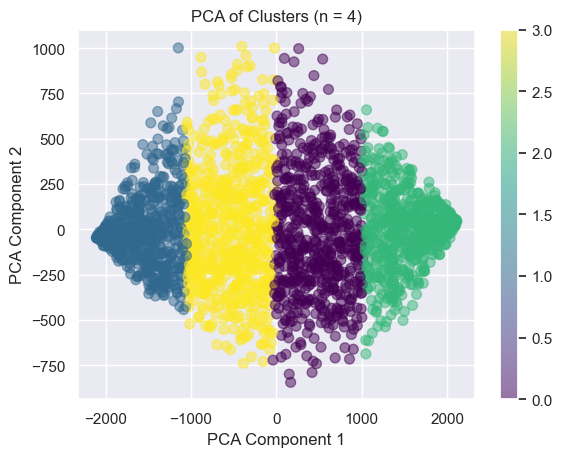

In [1017]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop('Cluster', axis=1))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_4, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters (n = 4)')
plt.colorbar()
plt.show()


In [1018]:
cluster_sizes

Cluster
0    630
3    621
2    612
1    585
Name: count, dtype: int64

In [1019]:
final_old_customer_list.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,...,age_group,list_price,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Cluster
0,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,...,70-79,9084.45,7,11,3018.09,4,4,3,443,0
1,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,...,40-49,4149.07,128,3,2226.26,1,1,2,112,3
2,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,...,50-59,5357.55,78,6,2353.11,2,2,2,222,3
3,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,...,30-39,6394.21,67,7,3540.03,2,3,3,233,0
4,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,...,60-69,7734.74,27,7,4337.38,3,3,4,334,2


In [1020]:
final_old_customer_list.shape

(2448, 21)

In [1021]:
# Ensure quartile columns are integers
final_old_customer_list['r_quartile'] = final_old_customer_list['r_quartile'].astype(int)
final_old_customer_list['f_quartile'] = final_old_customer_list['f_quartile'].astype(int)
final_old_customer_list['m_quartile'] = final_old_customer_list['m_quartile'].astype(int)

# Define the ranges for each quartile
r_quartile_ranges = {
    1: pd.Interval(85.0, 353.0, closed='both'),
    2: pd.Interval(44.0, 85.0, closed='both'),
    3: pd.Interval(17.0, 44.0, closed='both'),
    4: pd.Interval(0.0, 17.0, closed='both')
}

f_quartile_ranges = {
    1: pd.Interval(7.0, 14.0, closed='both'),
    2: pd.Interval(6.0, 7.0, closed='both'),
    3: pd.Interval(4.0, 6.0, closed='both'),
    4: pd.Interval(1.0, 4.0, closed='both')
}

m_quartile_ranges = {
    1: pd.Interval(4174.780000000001, 11668.949999999999, closed='both'),
    2: pd.Interval(2858.285, 4174.780000000001, closed='both'),
    3: pd.Interval(1853.5074999999997, 2858.285, closed='both'),
    4: pd.Interval(15.080000000000005, 1853.5074999999997, closed='both')
}

# Map the ranges to the DataFrame
final_old_customer_list['r_quartile_range'] = final_old_customer_list['r_quartile'].map(r_quartile_ranges)
final_old_customer_list['f_quartile_range'] = final_old_customer_list['f_quartile'].map(f_quartile_ranges)
final_old_customer_list['m_quartile_range'] = final_old_customer_list['m_quartile'].map(m_quartile_ranges)

# Print the updated DataFrame
print(final_old_customer_list)


               brand product_line product_class product_size  \
0     Giant Bicycles     Standard        medium       medium   
1           WeareA2B     Standard        medium       medium   
2              Solex     Standard        medium       medium   
3     Norco Bicycles     Standard        medium       medium   
4              Solex     Standard        medium       medium   
...              ...          ...           ...          ...   
2443      OHM Cycles     Standard        medium        small   
2444   Trek Bicycles         Road        medium       medium   
2445      OHM Cycles     Standard        medium       medium   
2446  Norco Bicycles     Standard        medium       medium   
2447  Giant Bicycles     Standard        medium       medium   

                                 job_title job_industry_category  \
0                      Executive Secretary                Health   
1                   Administrative Officer    Financial Services   
2     Business Systems Deve

In [1022]:
final_old_customer_list.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Cluster,r_quartile_range,f_quartile_range,m_quartile_range
0,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,...,11,3018.09,4,4,3,443,0,"[0.0, 17.0]","[1.0, 4.0]","[1853.5074999999997, 2858.285]"
1,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,...,3,2226.26,1,1,2,112,3,"[85.0, 353.0]","[7.0, 14.0]","[2858.285, 4174.780000000001]"
2,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,...,6,2353.11,2,2,2,222,3,"[44.0, 85.0]","[6.0, 7.0]","[2858.285, 4174.780000000001]"
3,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,...,7,3540.03,2,3,3,233,0,"[44.0, 85.0]","[4.0, 6.0]","[1853.5074999999997, 2858.285]"
4,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,...,7,4337.38,3,3,4,334,2,"[17.0, 44.0]","[4.0, 6.0]","[15.080000000000005, 1853.5074999999997]"


In [1023]:
final_old_customer_list.shape

(2448, 24)

In [1024]:
final_old_customer_list['job_industry_category'].value_counts()

job_industry_category
Manufacturing         594
Financial Services    588
Health                466
Retail                253
Property              201
Entertainment         105
IT                    105
Argiculture            86
Telecommunications     50
Name: count, dtype: int64

In [1025]:
final_old_customer_list.shape

(2448, 24)

In [1026]:
final_old_customer_list.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Cluster,r_quartile_range,f_quartile_range,m_quartile_range
0,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,...,11,3018.09,4,4,3,443,0,"[0.0, 17.0]","[1.0, 4.0]","[1853.5074999999997, 2858.285]"
1,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,...,3,2226.26,1,1,2,112,3,"[85.0, 353.0]","[7.0, 14.0]","[2858.285, 4174.780000000001]"
2,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,...,6,2353.11,2,2,2,222,3,"[44.0, 85.0]","[6.0, 7.0]","[2858.285, 4174.780000000001]"
3,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,...,7,3540.03,2,3,3,233,0,"[44.0, 85.0]","[4.0, 6.0]","[1853.5074999999997, 2858.285]"
4,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,...,7,4337.38,3,3,4,334,2,"[17.0, 44.0]","[4.0, 6.0]","[15.080000000000005, 1853.5074999999997]"


## Assigning a title to a customer

In [1027]:
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

final_old_customer_list['customer_title'] = pd.qcut(final_old_customer_list['rfm_score'], 4, ['Bronze','Silver','Gold','Diamond'])
final_old_customer_list.head()

,brand,product_line,product_class,product_size,job_title,job_industry_category,wealth_segment,gender,state,profit,...,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Cluster,r_quartile_range,f_quartile_range,m_quartile_range,customer_title
0,Giant Bicycles,Standard,medium,medium,Executive Secretary,Health,Mass Customer,Female,NSW,3018.09,...,3018.09,4,4,3,443,0,"[0.0, 17.0]","[1.0, 4.0]","[1853.5074999999997, 2858.285]",Diamond
1,WeareA2B,Standard,medium,medium,Administrative Officer,Financial Services,Mass Customer,Male,NSW,2226.26,...,2226.26,1,1,2,112,3,"[85.0, 353.0]","[7.0, 14.0]","[2858.285, 4174.780000000001]",Bronze
2,Solex,Standard,medium,medium,Business Systems Development Analyst,Argiculture,Affluent Customer,Female,NSW,2353.11,...,2353.11,2,2,2,222,3,"[44.0, 85.0]","[6.0, 7.0]","[2858.285, 4174.780000000001]",Silver
3,Norco Bicycles,Standard,medium,medium,Nuclear Power Engineer,Manufacturing,Mass Customer,Male,QLD,3540.03,...,3540.03,2,3,3,233,0,"[44.0, 85.0]","[4.0, 6.0]","[1853.5074999999997, 2858.285]",Silver
4,Solex,Standard,medium,medium,Developer I,Financial Services,High Net Worth,Male,VIC,4337.38,...,4337.38,3,3,4,334,2,"[17.0, 44.0]","[4.0, 6.0]","[15.080000000000005, 1853.5074999999997]",Gold


## Creating a Detail Customer title / tag based on RFM Score

In [1028]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Diamond Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'High Loyalty'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Mid Loyalty'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Achiever'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Churning Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Churned Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Elusive Customer'
    else :
        return 'Churned Customer'

In [1029]:
# Applying the above functions and creating a new feature detail_cust_title

final_old_customer_list['detail_cust_title'] = final_old_customer_list[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [1030]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Diamond Customer':
        return 1
    elif title=='High Loyalty':
        return 2
    elif title == 'Mid Loyalty':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Achiever':
        return 6
    elif title == 'Churning Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Churned Customer':
        return 9
    elif title == 'Elusive Customer':
        return 10
    else :
        return 11

In [1031]:
# Applying the above functions and creating a new feature rank

final_old_customer_list['rank'] = final_old_customer_list[['detail_cust_title']].apply(get_rank, axis=1)

In [1032]:
final_old_customer_list['detail_cust_title'].value_counts()

detail_cust_title
High Risk Customer         279
Elusive Customer           267
Potential Customer         257
Late Achiever              256
Recent Customer            250
Mid Loyalty                235
Churning Customer          230
Almost Churned Customer    217
Churned Customer           213
High Loyalty               129
Diamond Customer           115
Name: count, dtype: int64

## Customer segment distribution

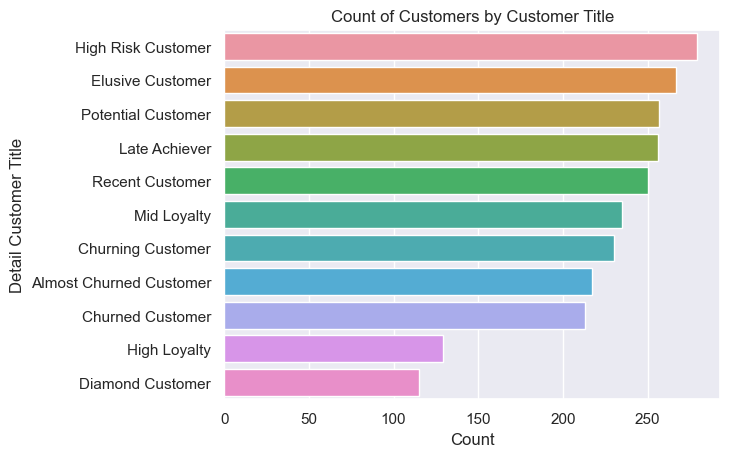

In [1033]:
sns.countplot(data = final_old_customer_list, y='detail_cust_title', order = final_old_customer_list['detail_cust_title'].value_counts().index)
plt.title('Count of Customers by Customer Title')
plt.xlabel('Count')
plt.ylabel('Detail Customer Title')

plt.show()

In [1034]:
final_old_customer_list.columns

Index(['brand', 'product_line', 'product_class', 'product_size', 'job_title',
       'job_industry_category', 'wealth_segment', 'gender', 'state', 'profit',
       'age', 'age_group', 'list_price', 'recency', 'frequency', 'monetary',
       'r_quartile', 'f_quartile', 'm_quartile', 'rfm_score', 'Cluster',
       'r_quartile_range', 'f_quartile_range', 'm_quartile_range',
       'customer_title', 'detail_cust_title', 'rank'],
      dtype='object')

## Exporting Datasets  to CSV

In [1036]:
final_old_customer_list.to_csv('final_old_customer_list.csv', index=False)